# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama : Mu'azah Al'Adawiyah
- Email : a429xbf292@devacademy.id
- Id Dicoding : A429XBF292

## Persiapan

### Menyiapkan library yang dibutuhkan

In [52]:
# Data manipulation
import numpy as np
import pandas as pd

# Scientific computing
import scipy

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error  

# Serialization (model saving/loading)
import joblib

# SQL database connection
from sqlalchemy import create_engine

In [53]:
import numpy
import pandas
import scipy
import matplotlib
import seaborn
import sklearn
import joblib
import sqlalchemy

packages = {
    "numpy": numpy.__version__,
    "pandas": pandas.__version__,
    "scipy": scipy.__version__,
    "matplotlib": matplotlib.__version__,
    "seaborn": seaborn.__version__,
    "scikit-learn": sklearn.__version__,
    "joblib": joblib.__version__,
    "sqlalchemy": sqlalchemy.__version__,
}

for name, version in packages.items():
    print(f"{name}: {version}")

numpy: 2.2.5
pandas: 2.2.3
scipy: 1.15.2
matplotlib: 3.10.1
seaborn: 0.13.2
scikit-learn: 1.6.1
joblib: 1.5.0
sqlalchemy: 2.0.40


### Menyiapkan data yang akan digunakan

In [54]:
file_path = 'dataset/employee_data.csv'
df = pd.read_csv(file_path)

print(df.head())

   EmployeeId  Age  Attrition     BusinessTravel  DailyRate  \
0           1   38        NaN  Travel_Frequently       1444   
1           2   37        1.0      Travel_Rarely       1141   
2           3   51        1.0      Travel_Rarely       1323   
3           4   42        0.0  Travel_Frequently        555   
4           5   40        NaN      Travel_Rarely       1194   

               Department  DistanceFromHome  Education EducationField  \
0         Human Resources                 1          4          Other   
1  Research & Development                11          2        Medical   
2  Research & Development                 4          4  Life Sciences   
3                   Sales                26          3      Marketing   
4  Research & Development                 2          4        Medical   

   EmployeeCount  ...  RelationshipSatisfaction StandardHours  \
0              1  ...                         2            80   
1              1  ...                         1     

## Data Understanding

- Menampilkan kembali dataset 5 baris pertama dari data tersebut.

In [55]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


- Menampilkan informasi umum tentang dataset, seperti jumlah baris dan kolom, tipe data tiap kolom, serta jumlah data yang tidak kosong (non-null).

In [56]:
print("Informasi Dataset :")
df.info()

Informasi Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   i

Maka dapatlah informasi dataset tersebut memiliki 35 kolom dengan 1470 baris. Dan type datanya sendiri yaitu terdapat float64 1 kolom, int64 26 kolom, dan type data object 8 kolom.

- Melakukan Missing Value

In [57]:
print("Missing Value : ")
print(df.isnull().sum())

Missing Value : 
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance        

Dari hasil diatas terdapat missing value pada kolom Attrition	sebanyak 412 baris. Maka perlu dilakukan penanganan terhadap missing value tersebut. Namun, penanganan akan dilakukan pada tahap data preparation dengan cara menghapus baris yang ada missing value, karena kolom kategorikal attrition hanya biner : 0 dan 1.

- Mengecek data duplikat pada dataset

In [58]:
print("Jumlah Data Duplikat : ")
print(df.duplicated().sum())

Jumlah Data Duplikat : 
0


Maka, dapat dikatakan bahwa dataset tidak memiliki data duplikat.

- Menampilkan Statistik Deskriptif dari dataset

In [59]:
print("Statistik Deskriptif : ")
df.describe()

Statistik Deskriptif : 


,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Insight dari Statistik yaitu :

- Dataset kaya akan fitur numerik ordinal dan kategori berskala (skor 1–4).
- Fitur attrition memiliki nilai mean
 0.169 yang berarti sekitar 17% karyawan keluar dari perusahaan sehingga terdapat ketidakseimbangan yang harus ditangani saat modeling.
- Fitur Age memiliki rentang usia sekitar 18-60 tahun dengan rata-rata 37 tahun yang memungkinkan lebih rentan untuk resign.
- Beberapa fitur menunjukkan indikasi potensial terhadap resign seperti: DistanceFromHome, JobInvolvement, EnvironmentSatisfaction, dan YearsSinceLastPromotion.

### Exploratory Data Analysis

Exploratory Data Analysis (EDA) adalah proses untuk memahami data secara mendalam sebelum modeling. Langkah-langkahnya meliputi melihat struktur dan ringkasan data, menganalisis distribusi fitur, menemukan outlier, dan mengevaluasi hubungan antar variabel. Tujuannya adalah untuk menemukan pola, anomali, dan insight awal yang membantu dalam menentukan strategi preprocessing dan pemilihan model yang tepat.

- Mendistribusikan Fitur Kategorikal

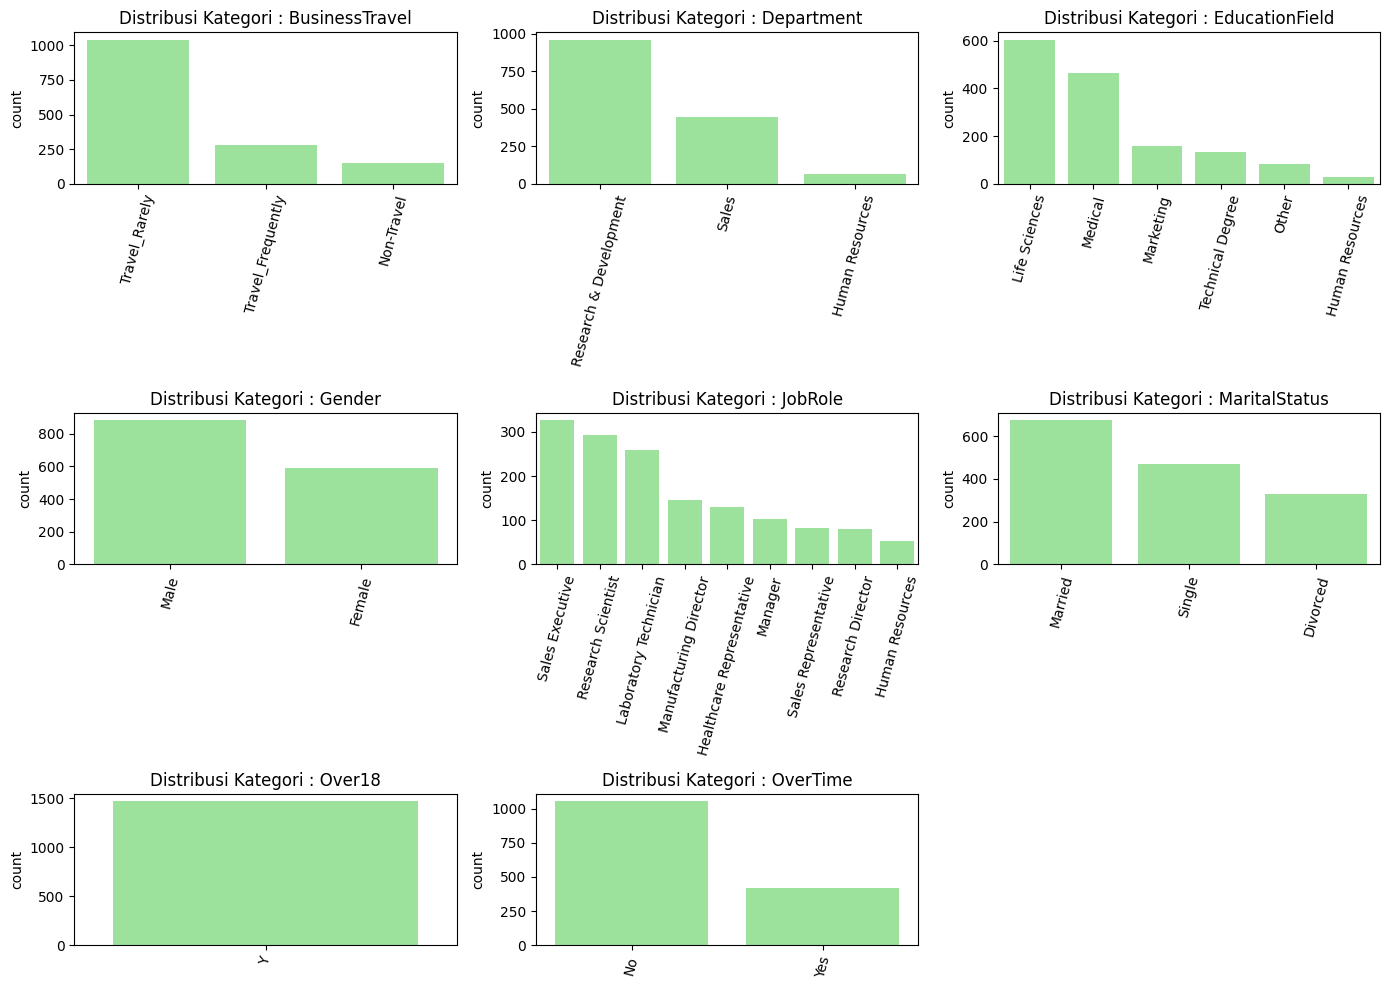

In [60]:
kategori = df.select_dtypes(include='object')

n_cols = 3
n_rows = 3
plots_per_page = n_cols * n_rows

for i in range (0, len(kategori.columns), plots_per_page):
  sub_cols = kategori.columns[i:i + plots_per_page]
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))
  axes = axes.flatten()

  for j, col in enumerate(sub_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[j], color='lightgreen')
    axes[j].set_title(f'Distribusi Kategori : {col}')
    axes[j].set_xlabel("")
    axes[j].tick_params(axis='x', rotation=75)

  for k in range (j + 1, plots_per_page) :
    fig.delaxes(axes[k])

plt.tight_layout()
plt.show()

Menvisualisasikan distribusi semua kolom kategorikal dalam dataset dengan membuat grafik countplot secara bertahap per 8 fitur per halaman. Hal ini membantu memahami sebaran kategori di setiap fitur, seperti dominasi kelas atau ketidakseimbangan data.

- Mendistribusikan Fitur Numerik

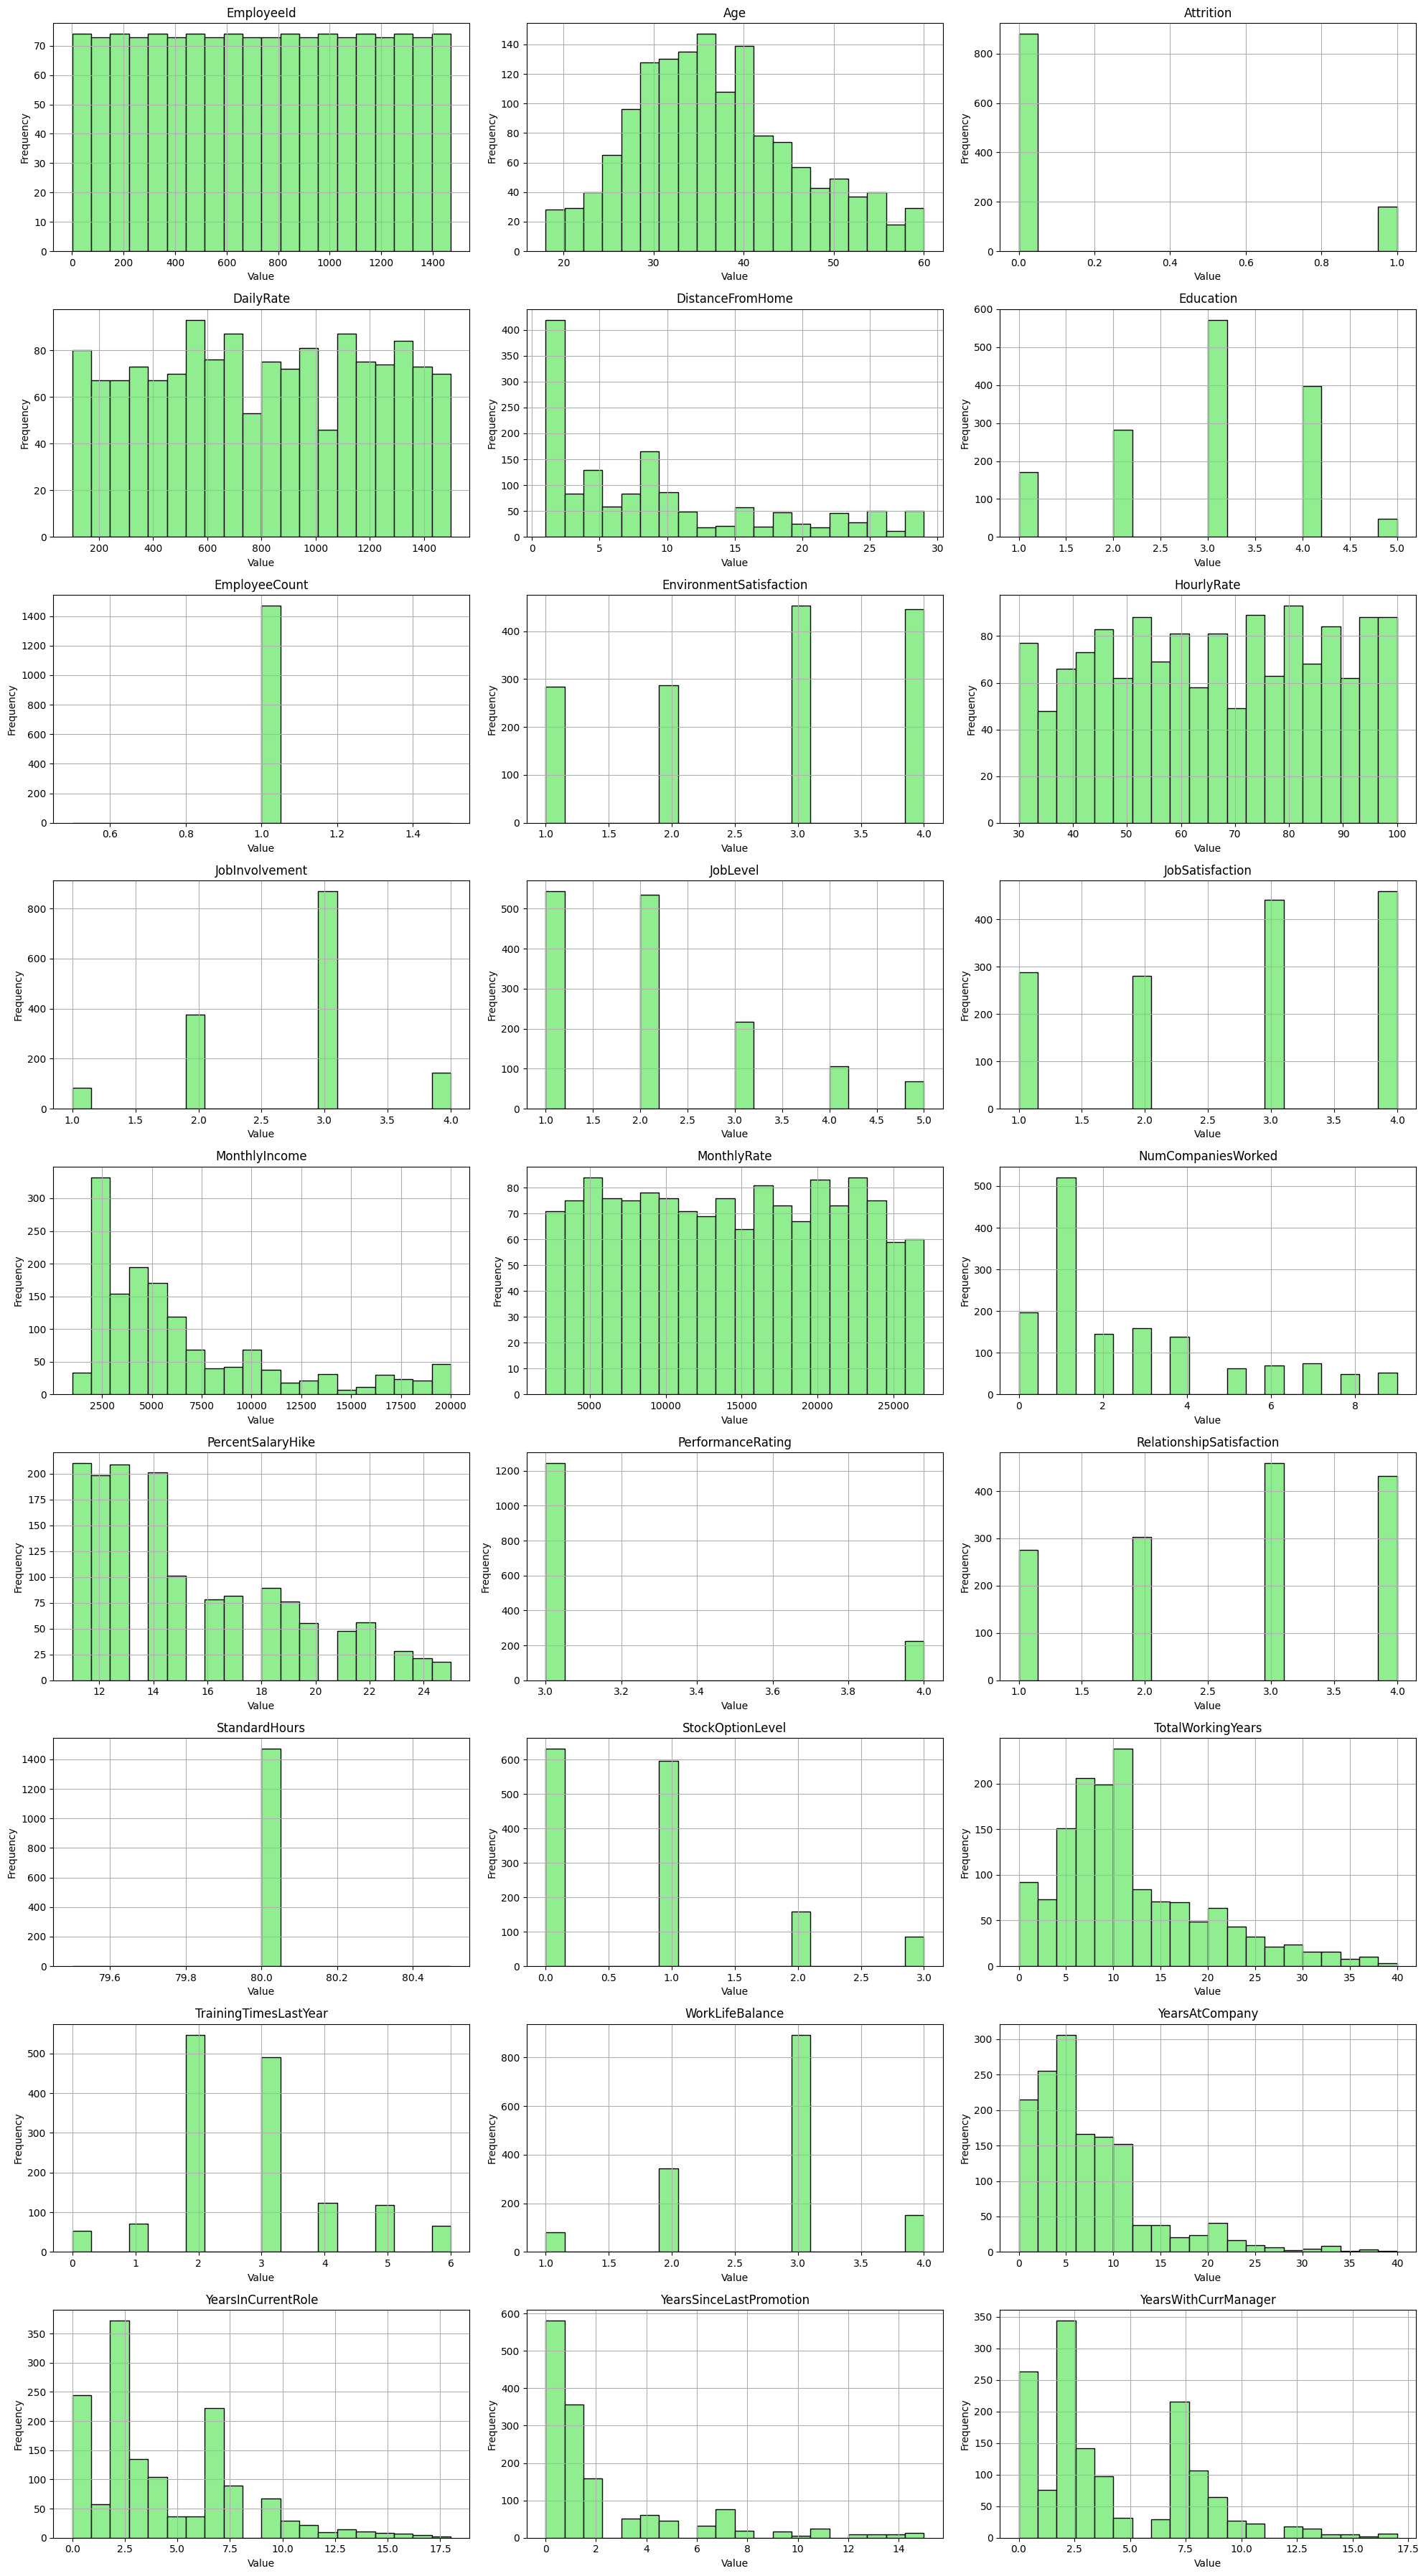

In [61]:
num_vars = df.select_dtypes(include='number').columns
n_cols = 3
n_rows = -(-len(num_vars) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, column in enumerate(num_vars):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black', color='lightgreen')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Membuat Histogram semua fitur numerik dalam dataset, sehingga bisa melihat distribusi masing-masing fitur secara visual. Histogram membantu mengidentifikasi pola distribusi data seperti normal, miring, atau adanya outlier.

- Boxplot Dateksi Outlier

--- Cek Outlier dengan Boxplot ---


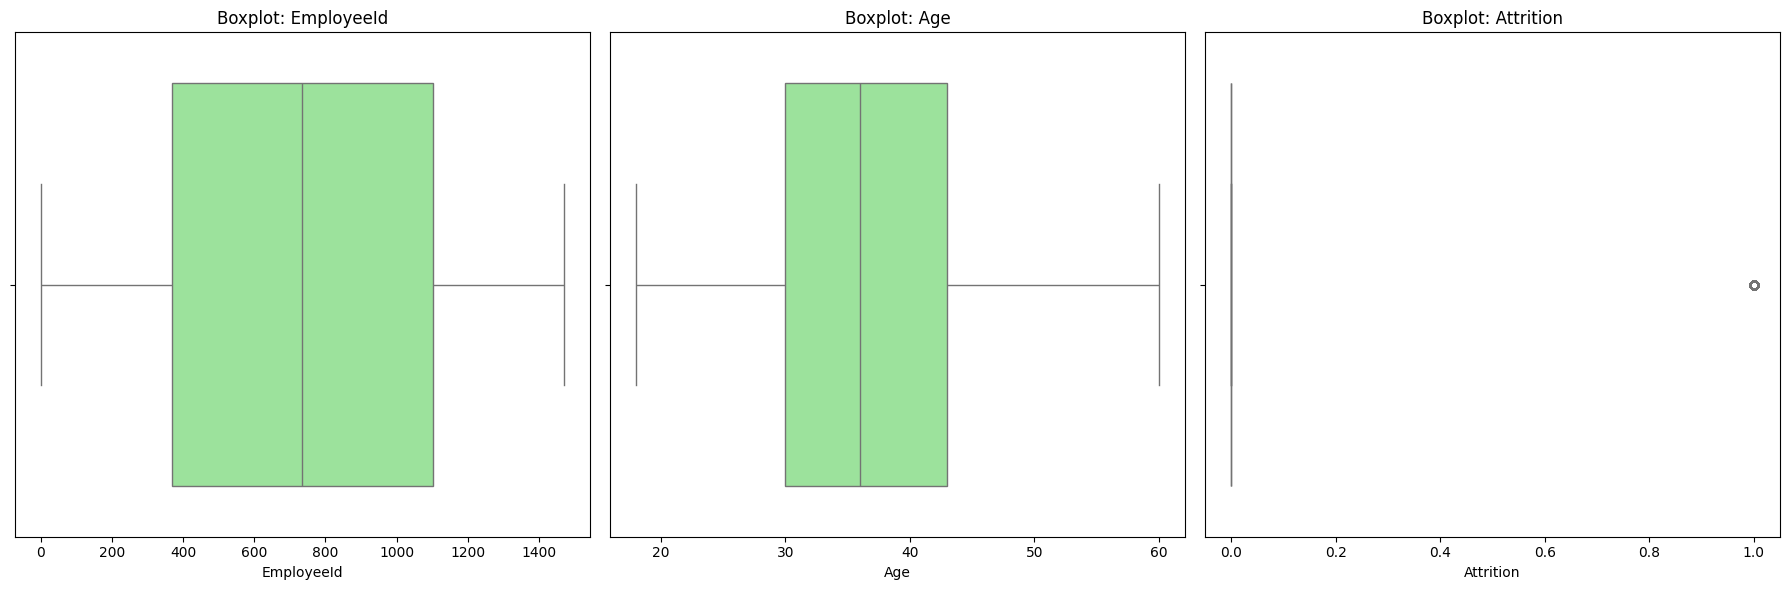

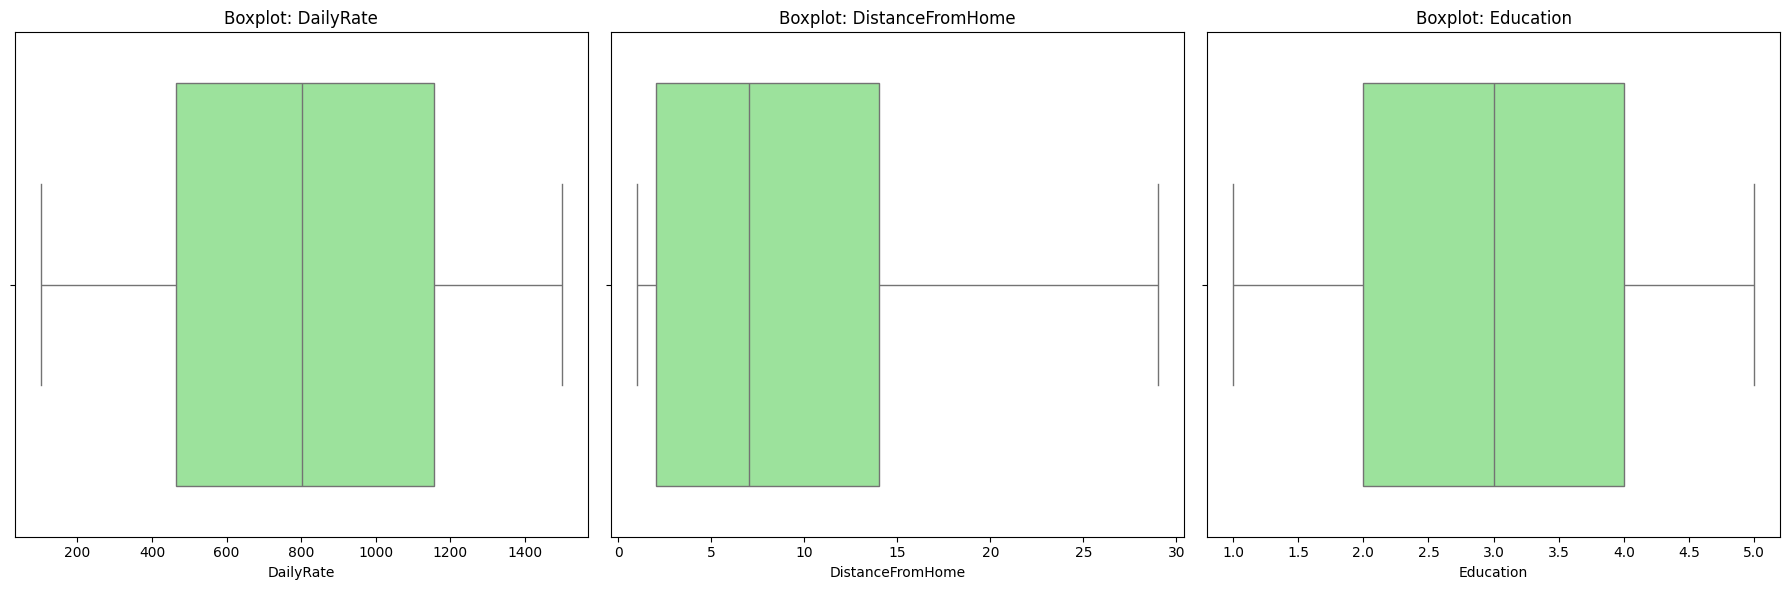

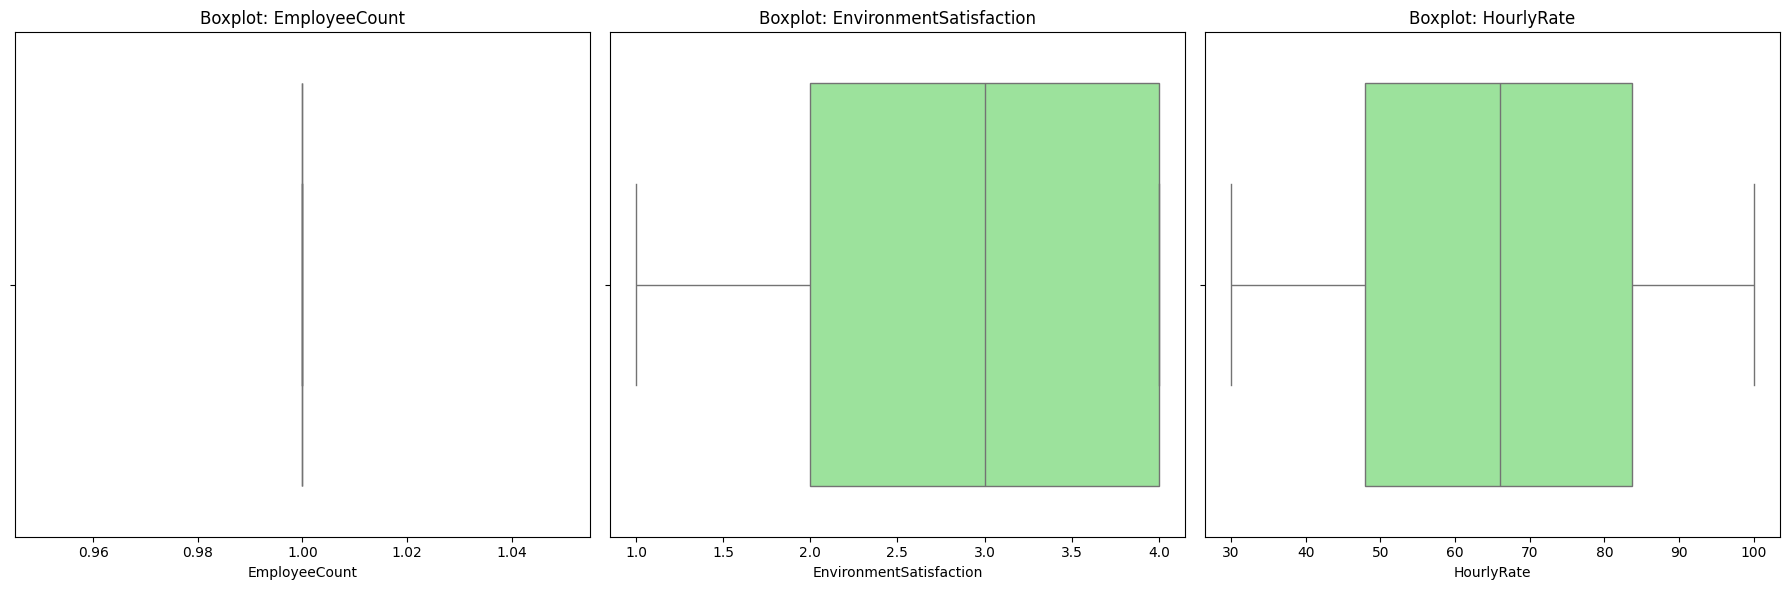

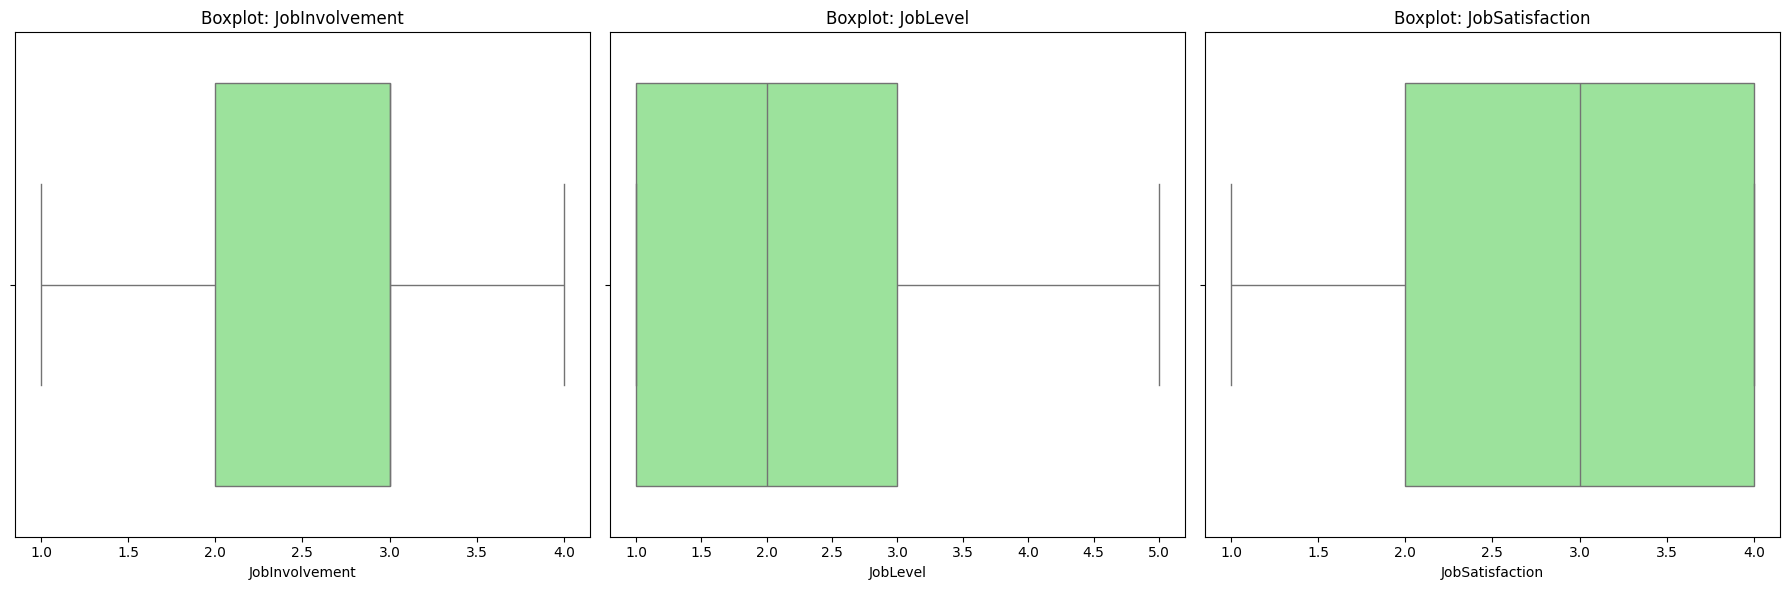

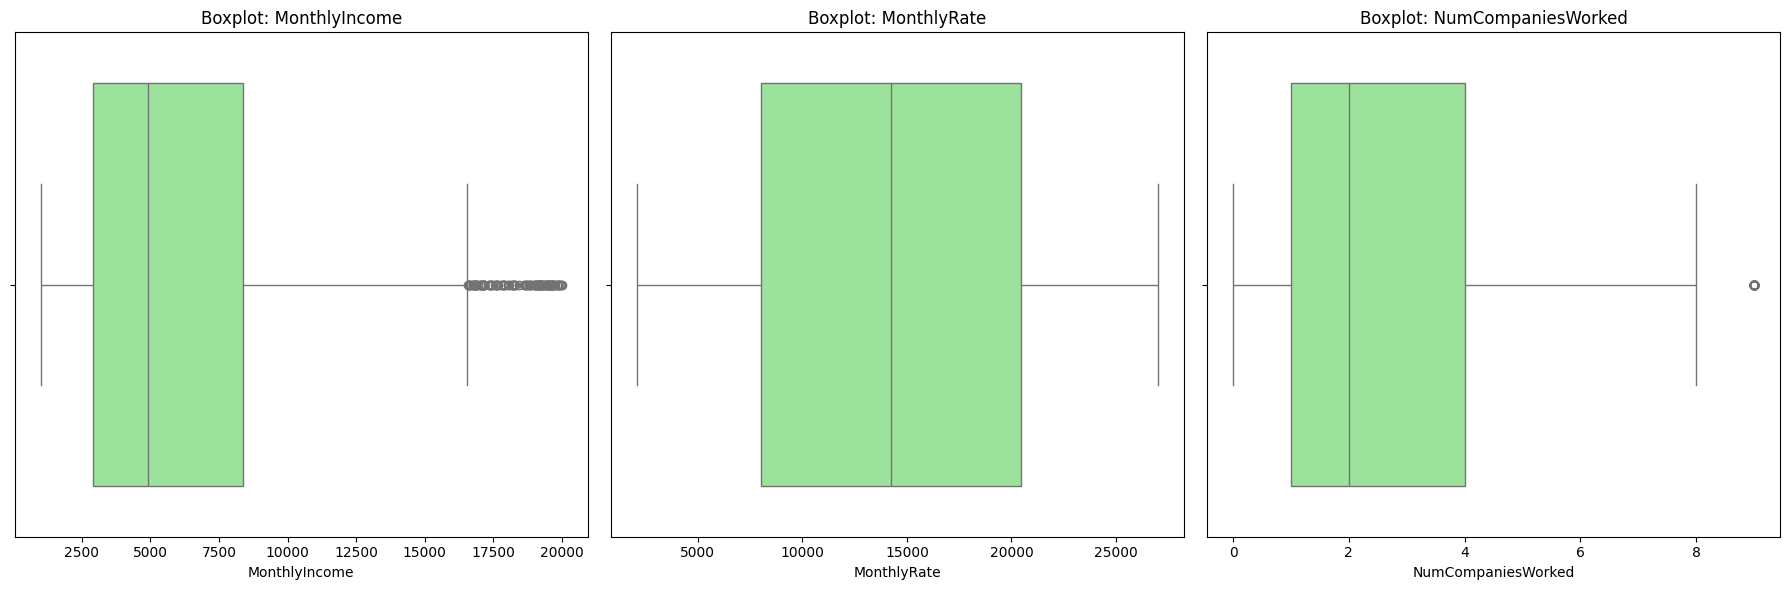

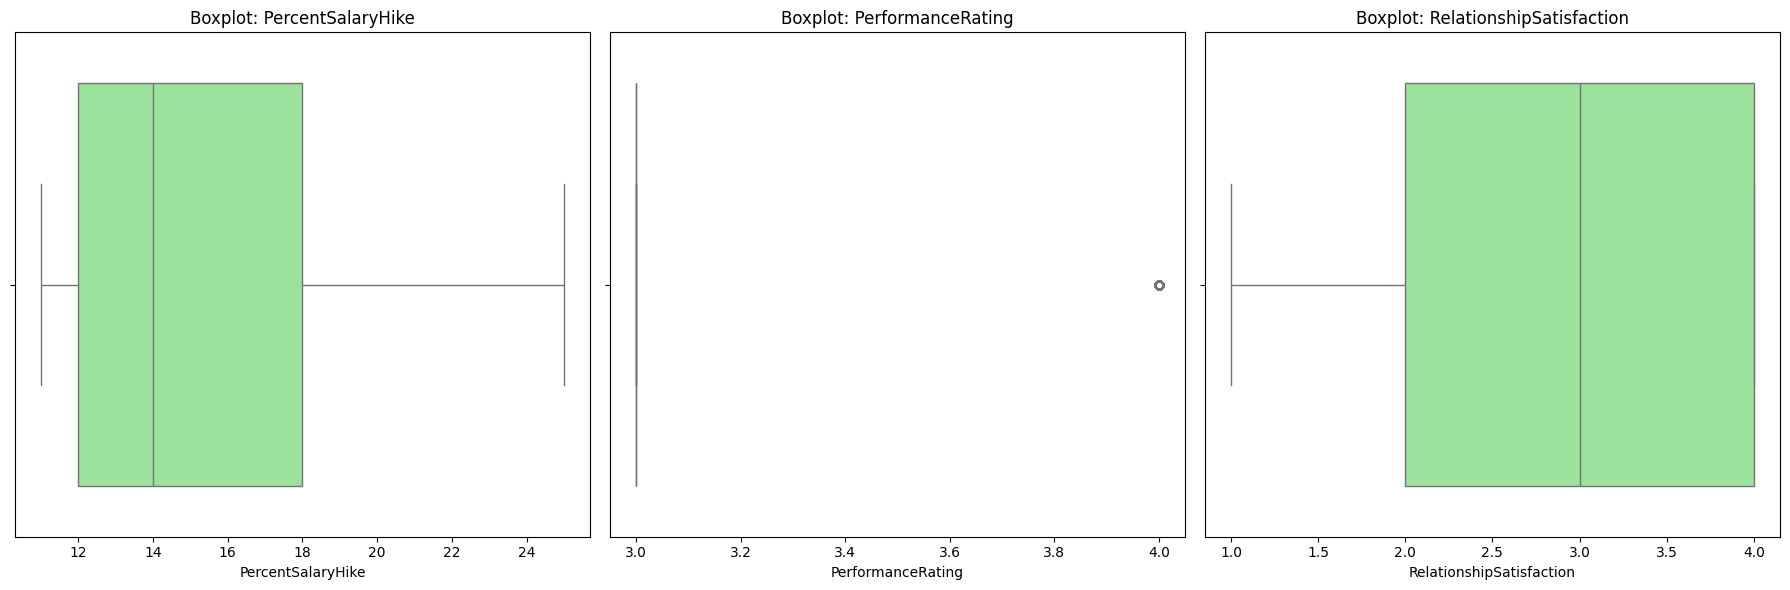

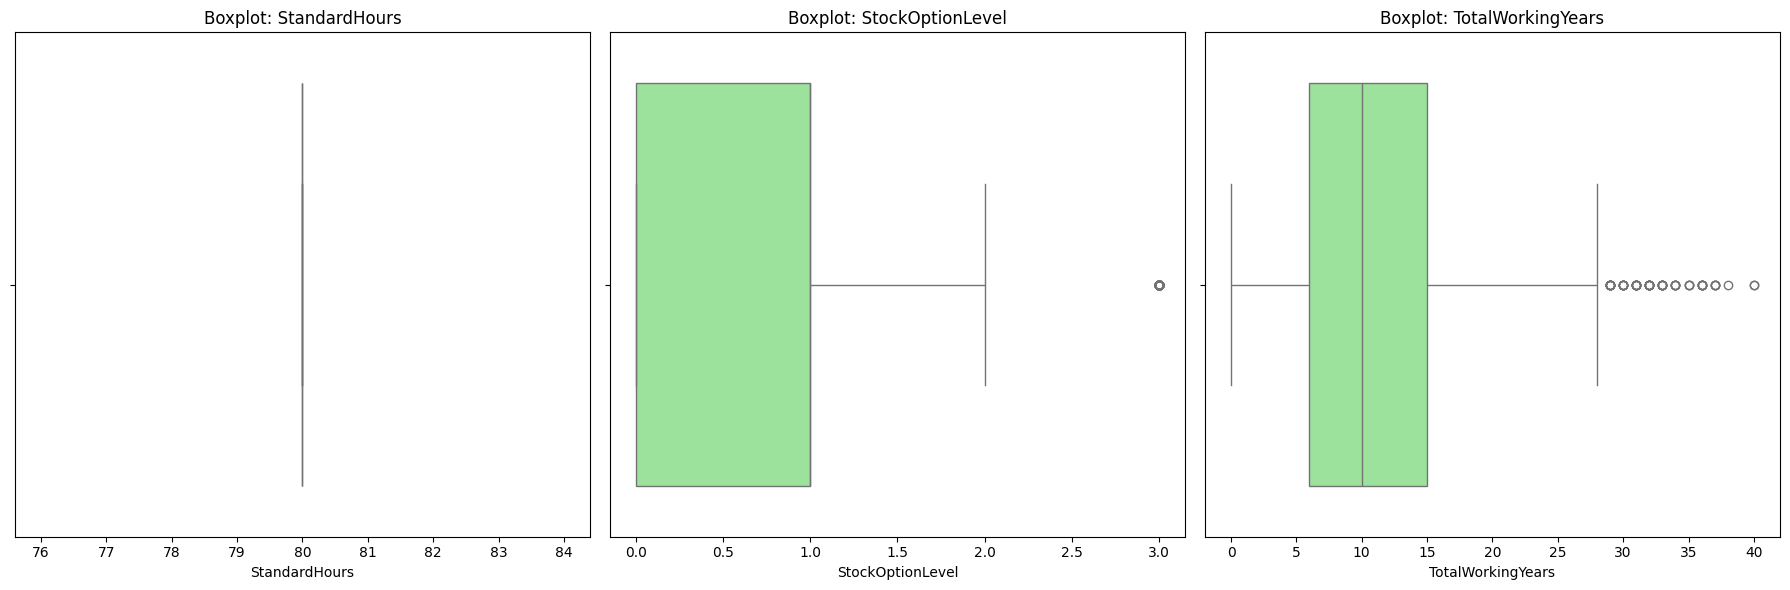

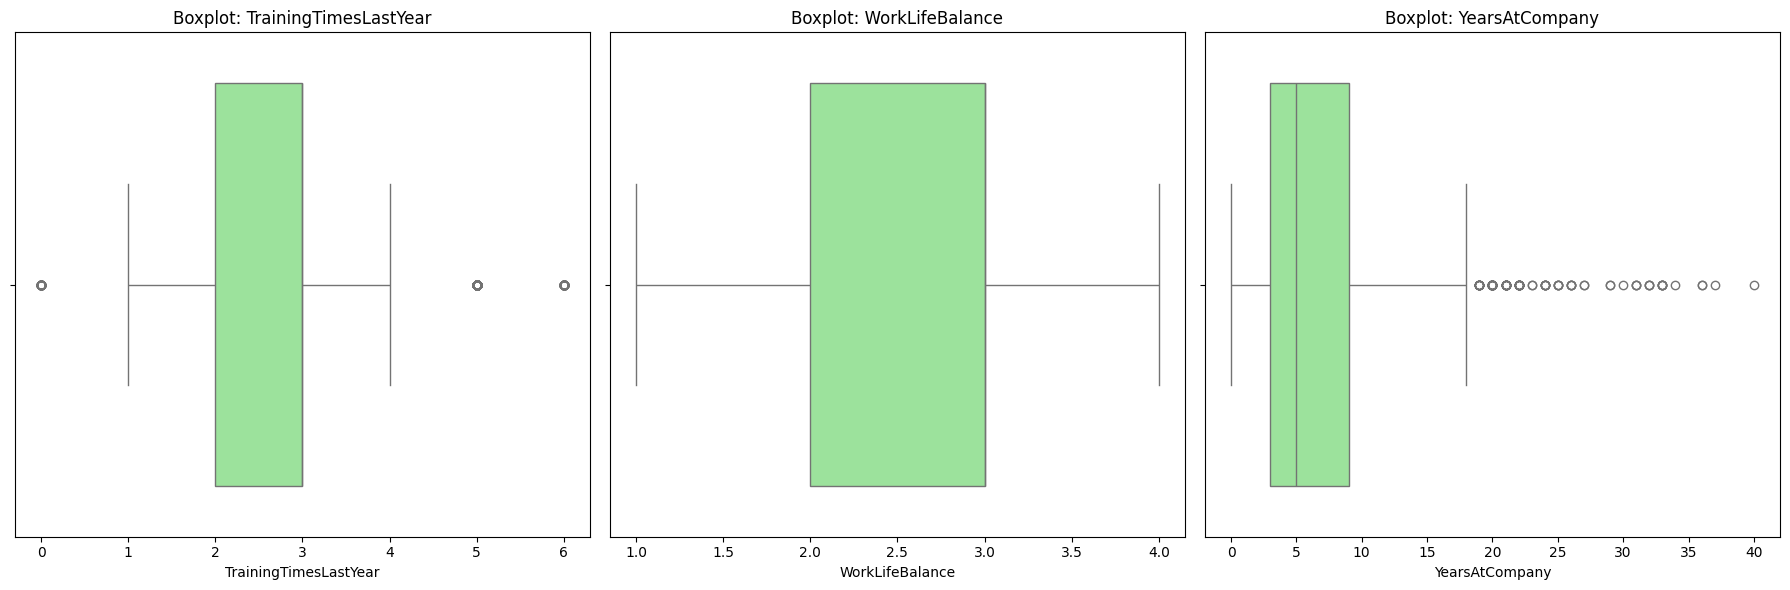

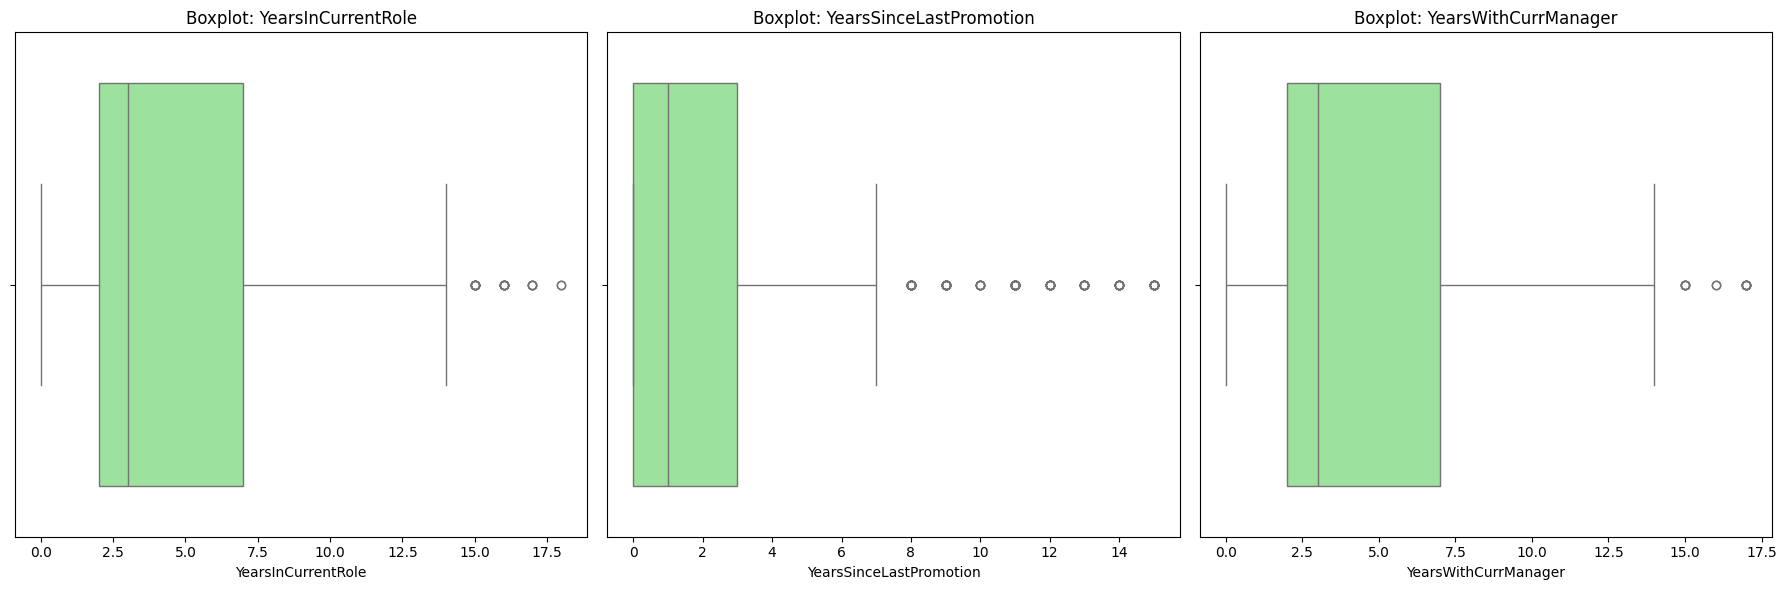

In [62]:
print('--- Cek Outlier dengan Boxplot ---')
cols_numerik = df.select_dtypes(include='number').columns

cols_per_row = 3
num_cols = len(cols_numerik)

for i in range(0, num_cols, cols_per_row):
    sub_cols = cols_numerik[i:i+cols_per_row]
    fig, axes = plt.subplots(1, len(sub_cols), figsize=(18, 6))

    if len(sub_cols) == 1:
        axes = [axes]

    for j, feature in enumerate(sub_cols):
        sns.boxplot(x=df[feature], ax=axes[j], color='lightgreen')
        axes[j].set_title(f'Boxplot: {feature}')

    plt.tight_layout()
    plt.show()

Menampilkan boxplot dari fitur-fitur numerik guna mendeteksi outlier, yaitu nilai-nilai ekstrem yang berada di luar rentang normal distribusi data. Dari hasil visualisasi diatas terdapat banyak outlier di beberapa fitur dalam dataset. Dan itu Setengah dari fitur dalam dataset yang kena deteksi outlier sehingga diperlukan penanganan pada saat tahap data preparation guna agar model lebih stabil, hasil lebih generalizable, dan interpretasi lebih valid. Jika tidak dilakukan akan dapat mempengaruhi performa model, terutama untuk model-model sensitif terhadap skala.

- Distribusi semua data

Cek Distribusi Data


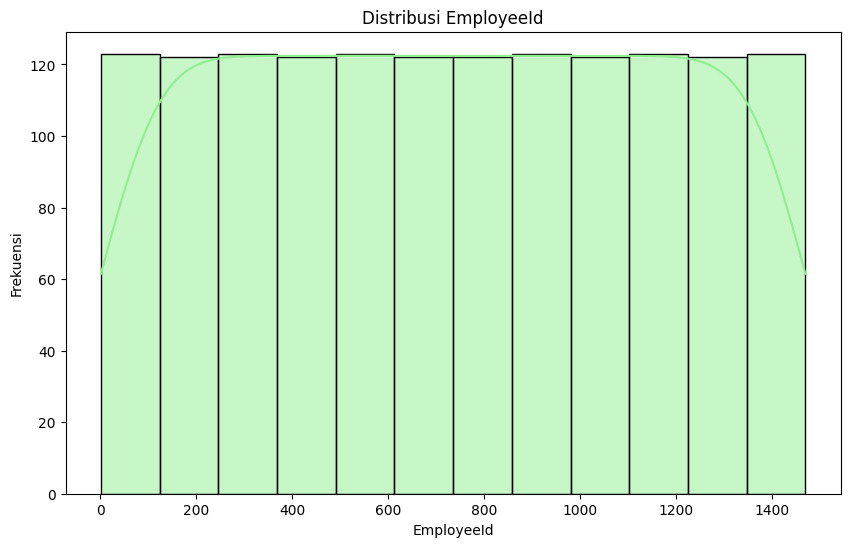

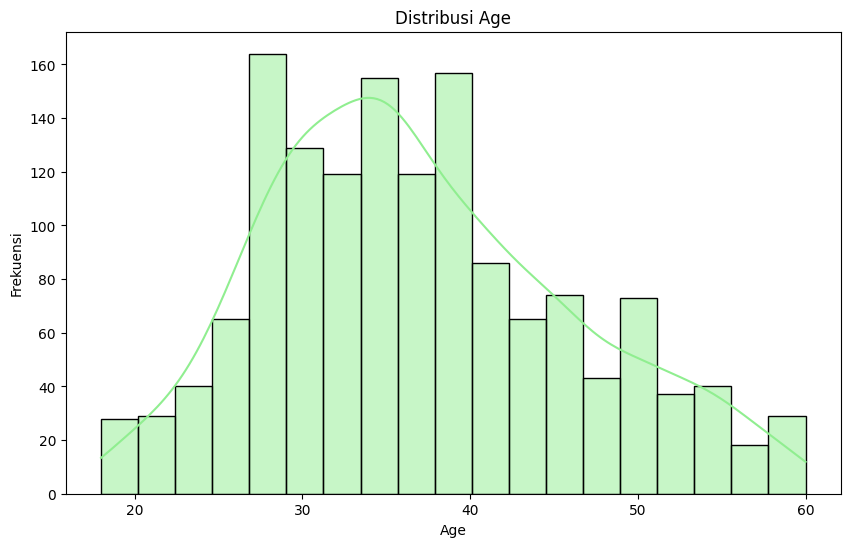

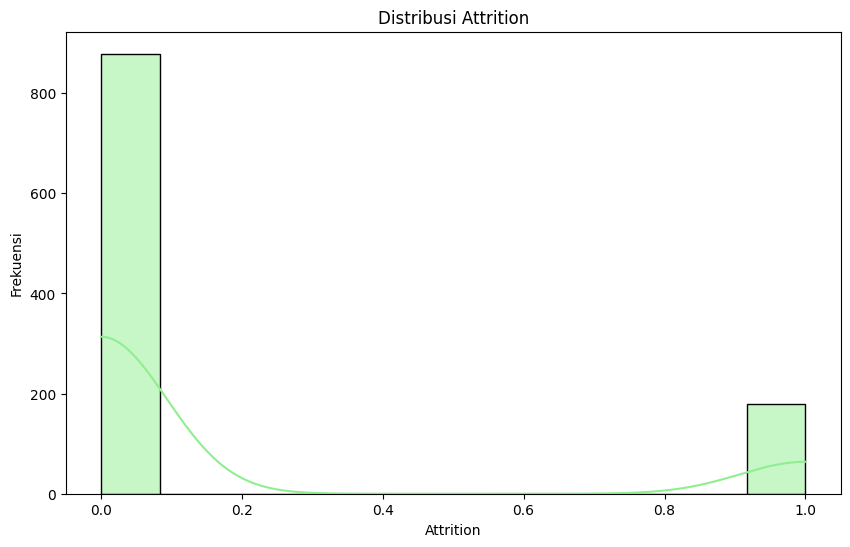

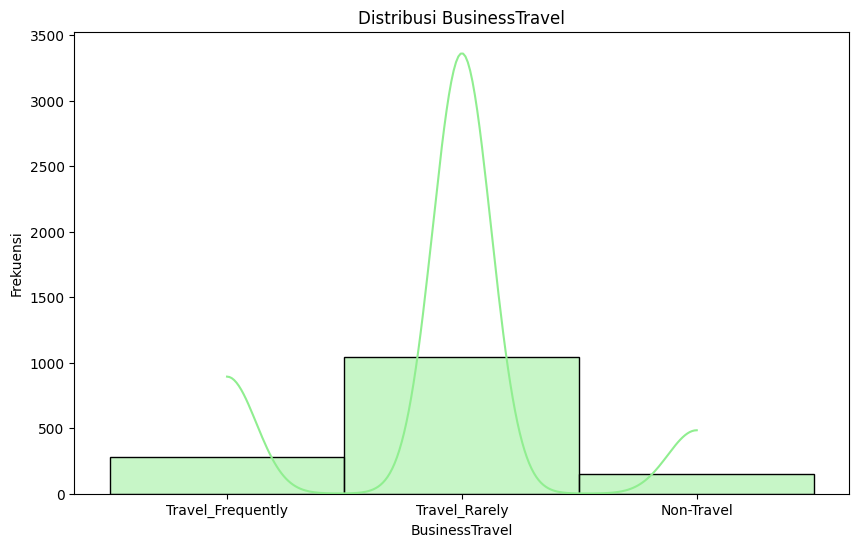

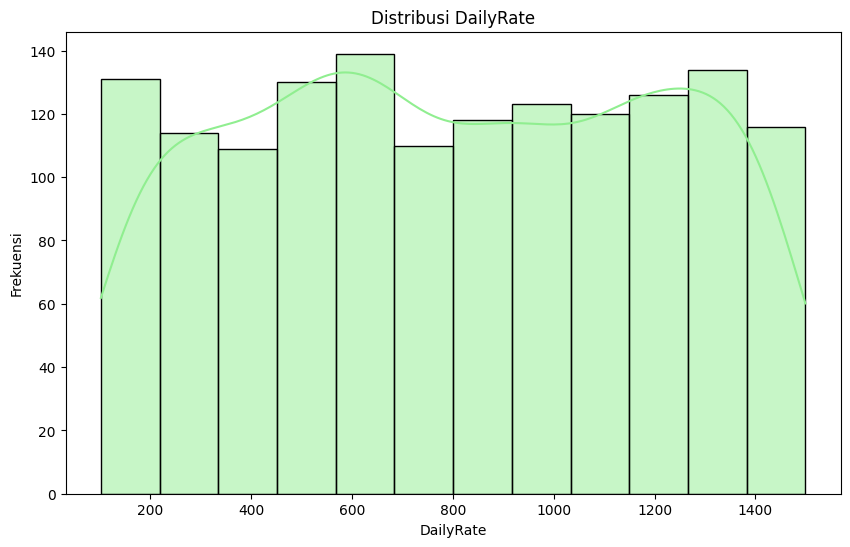

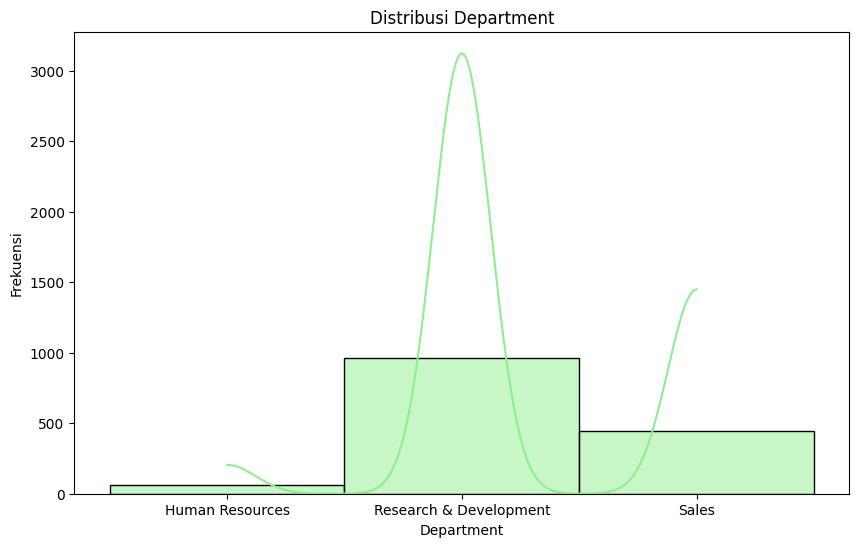

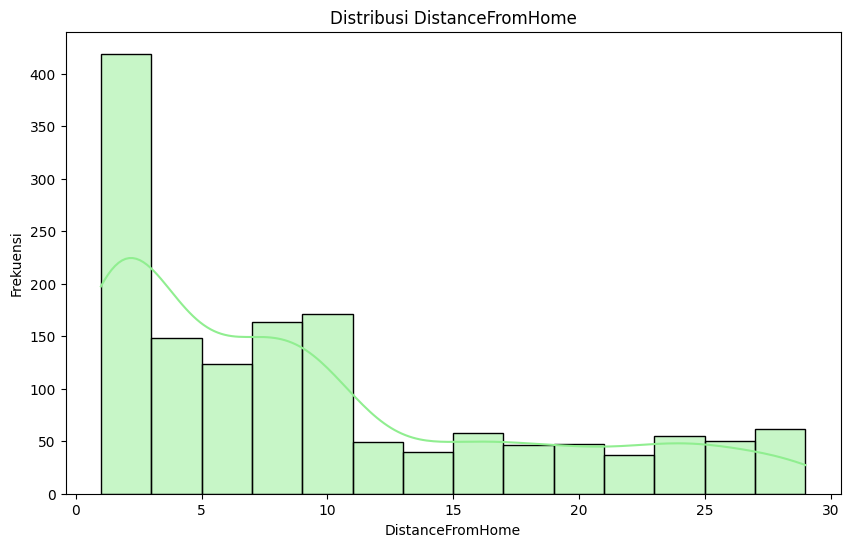

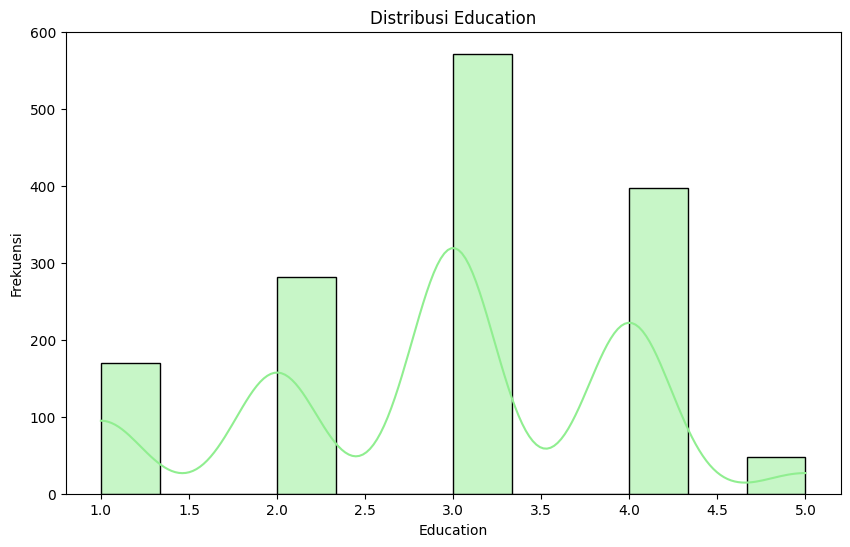

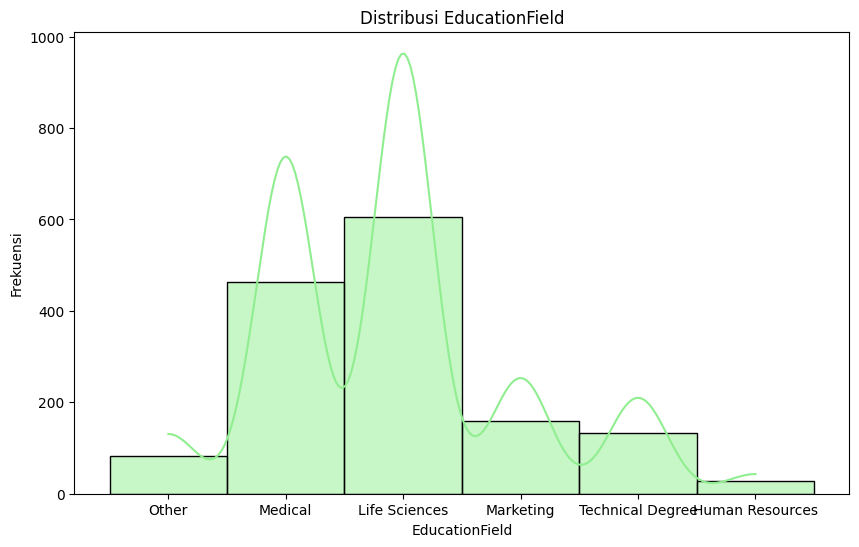

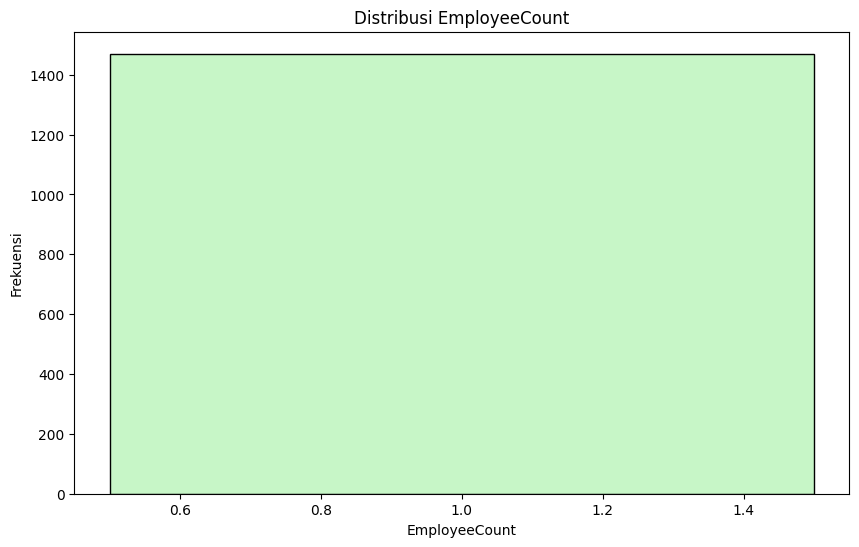

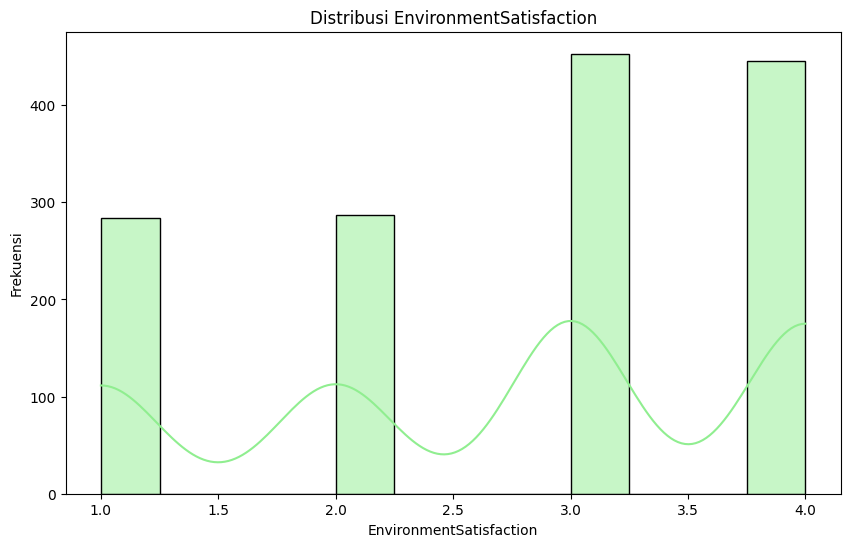

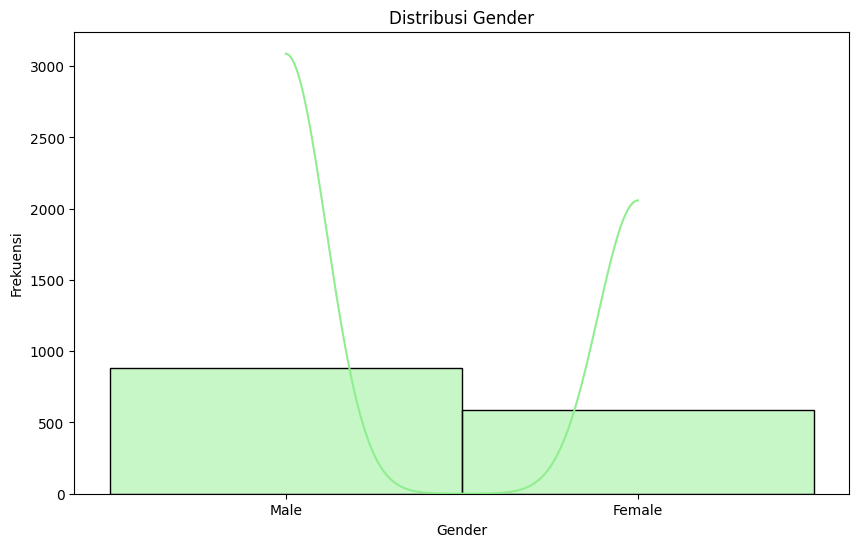

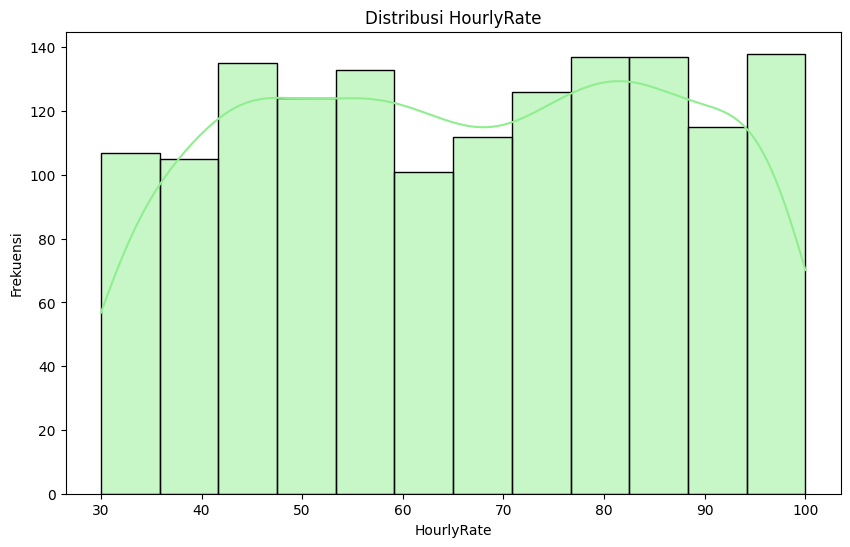

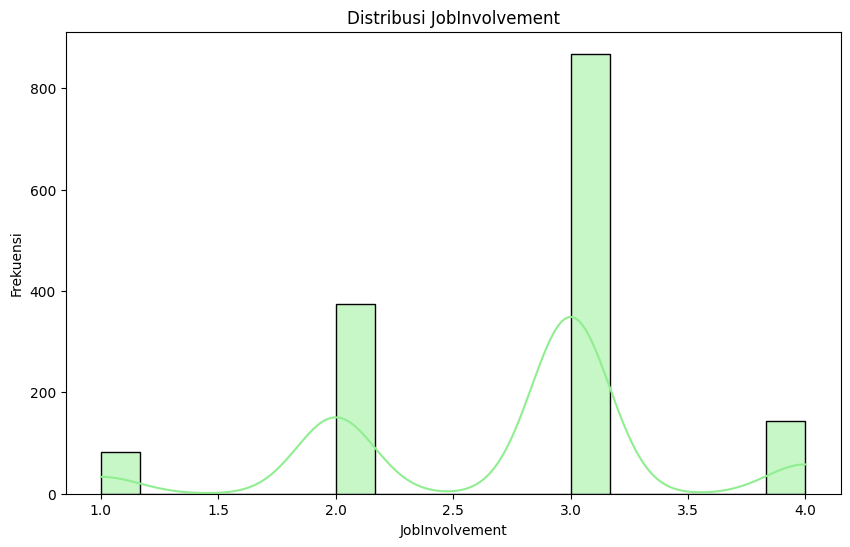

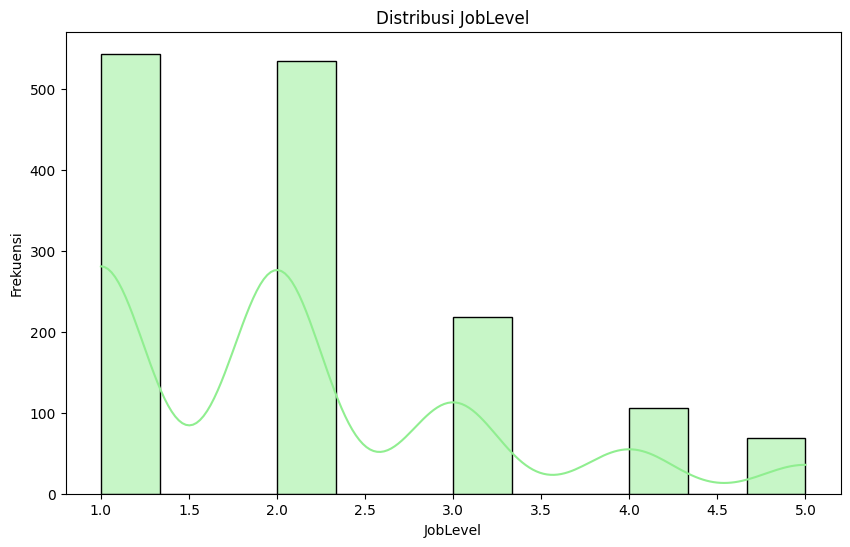

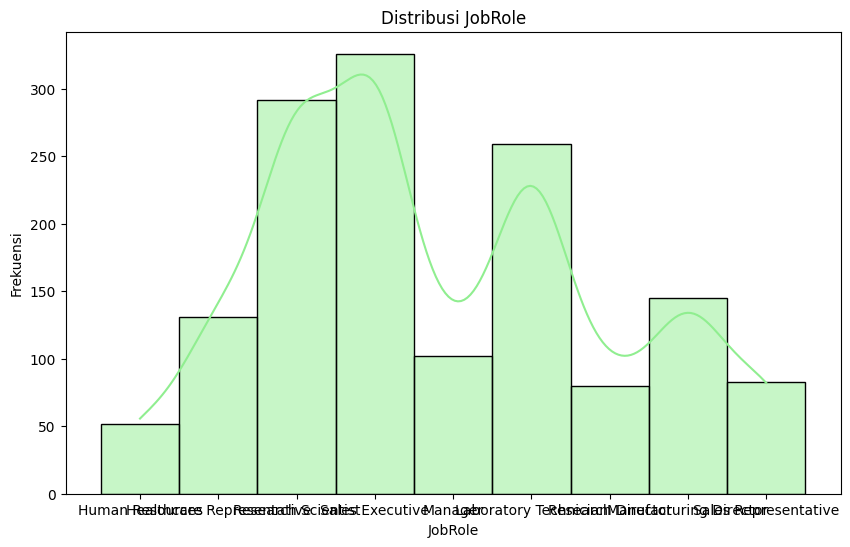

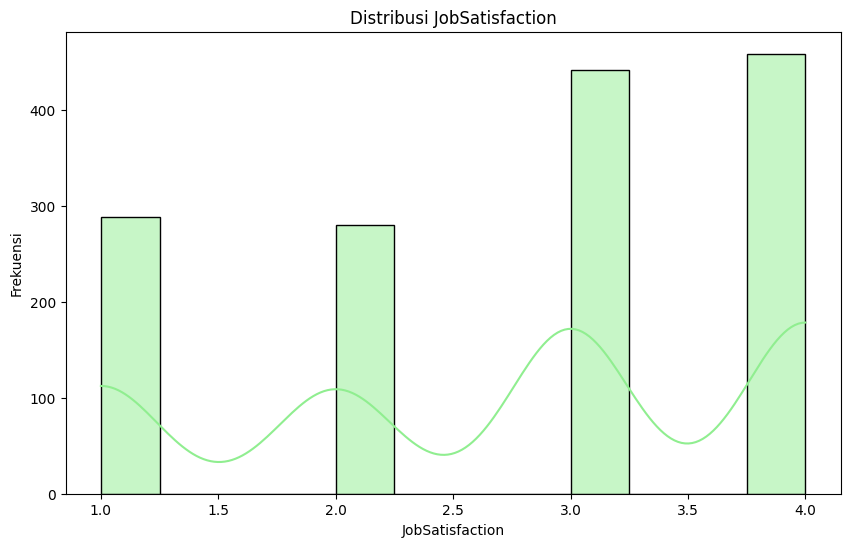

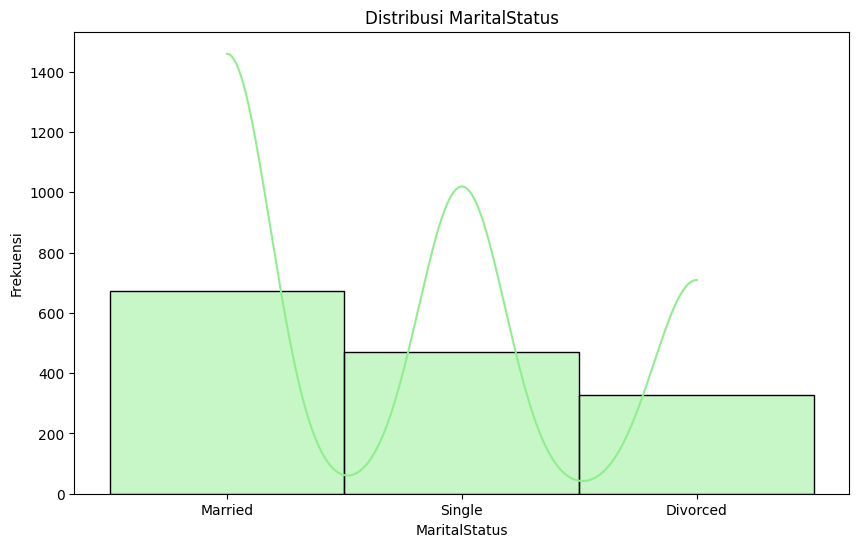

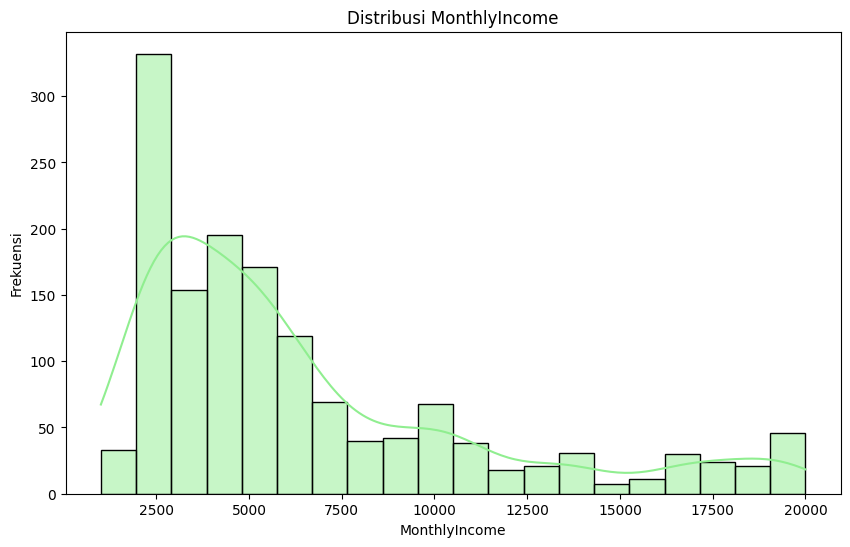

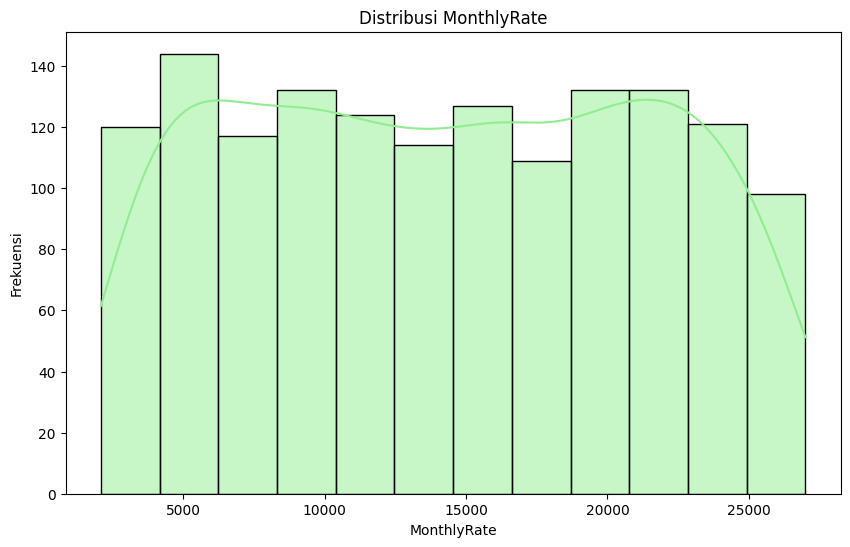

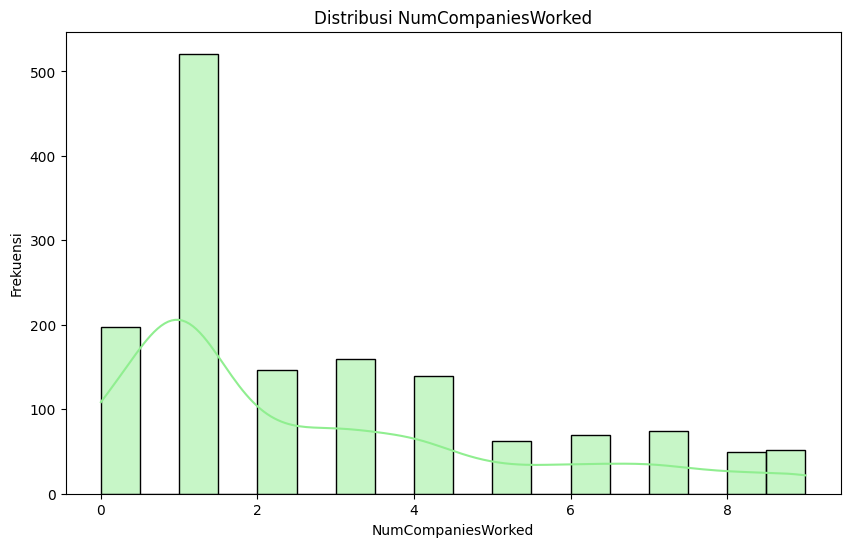

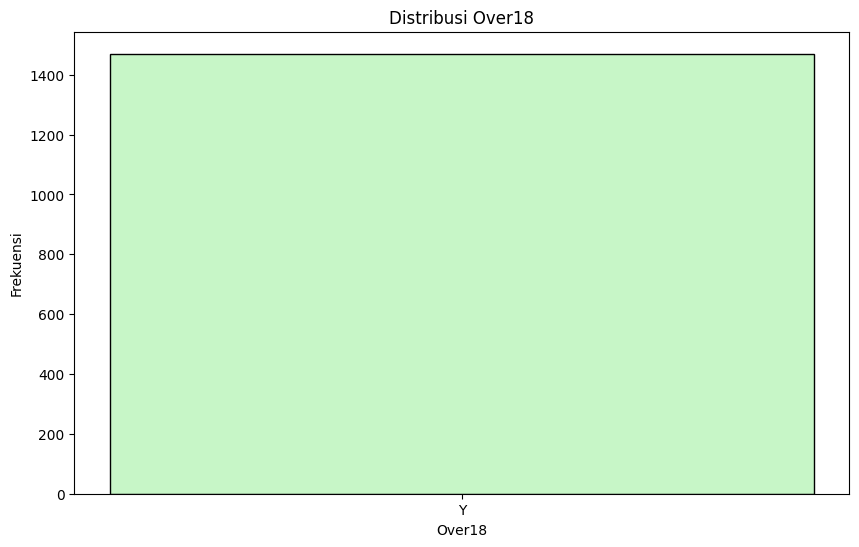

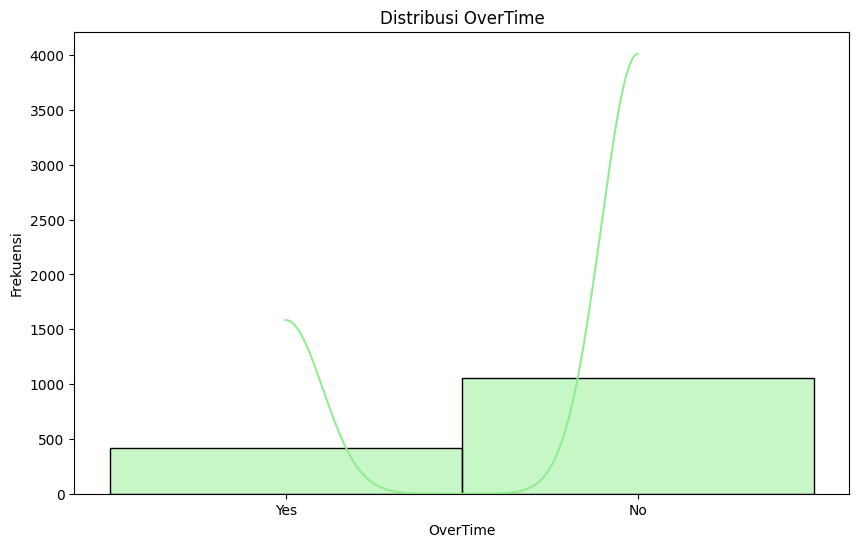

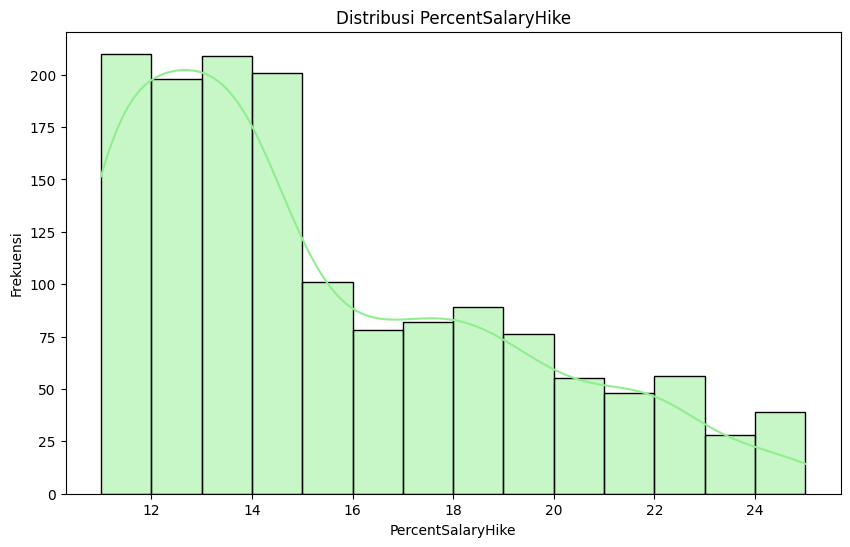

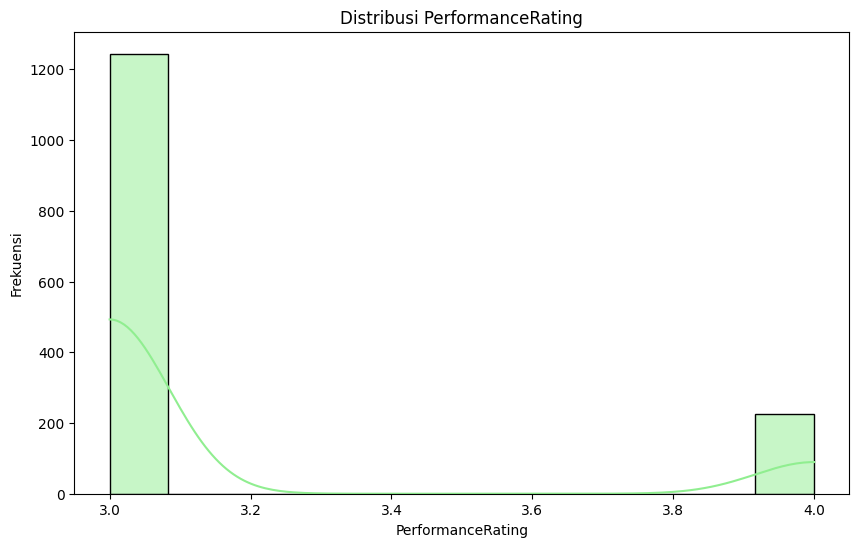

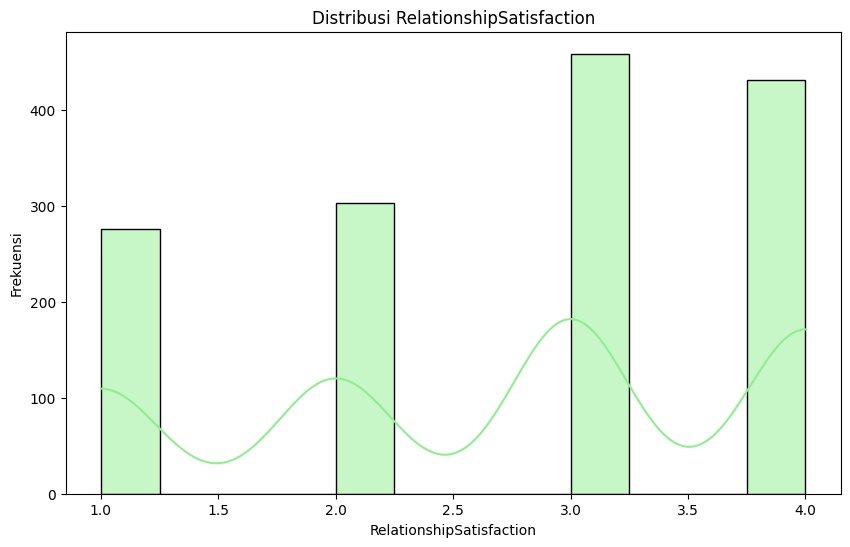

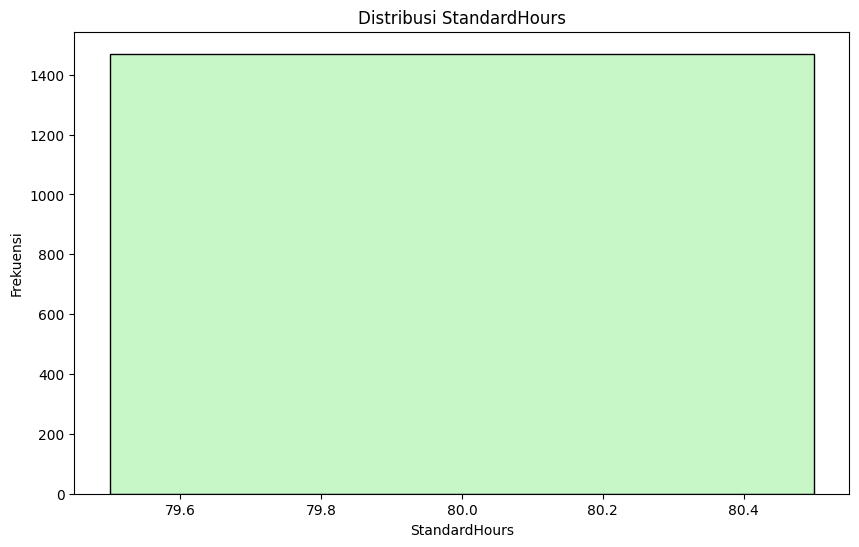

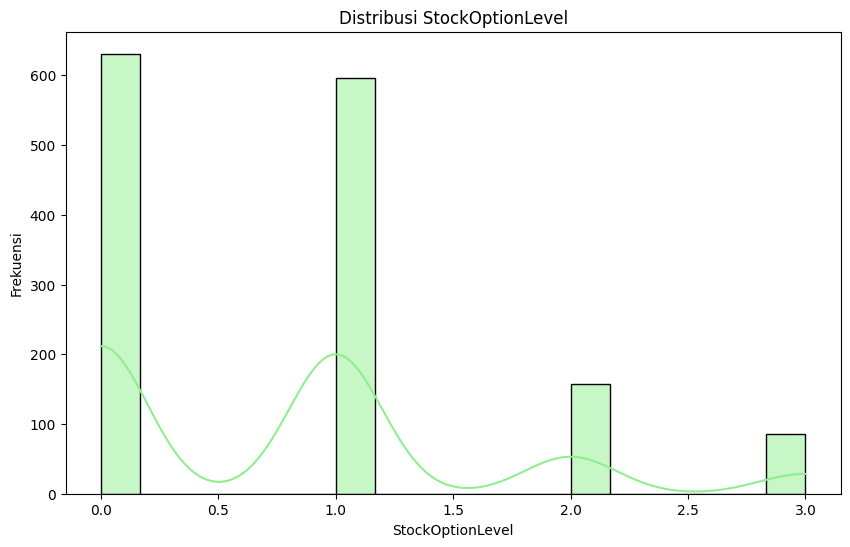

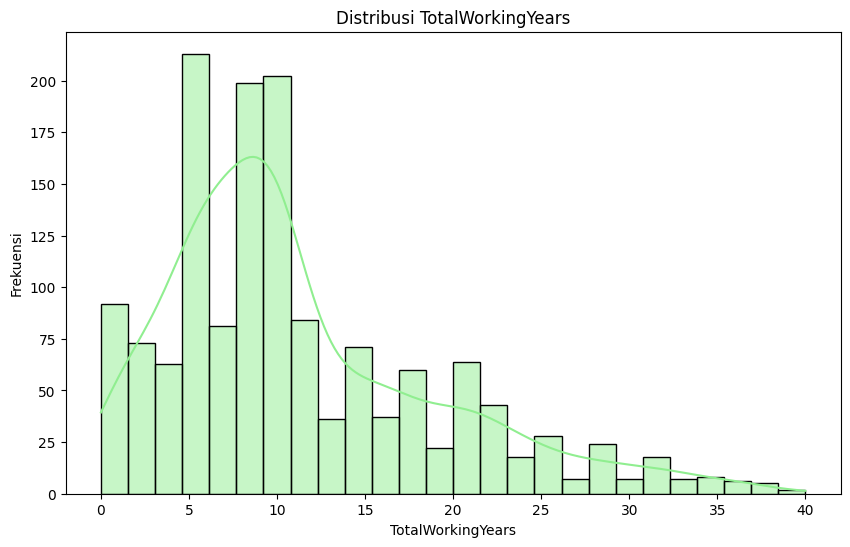

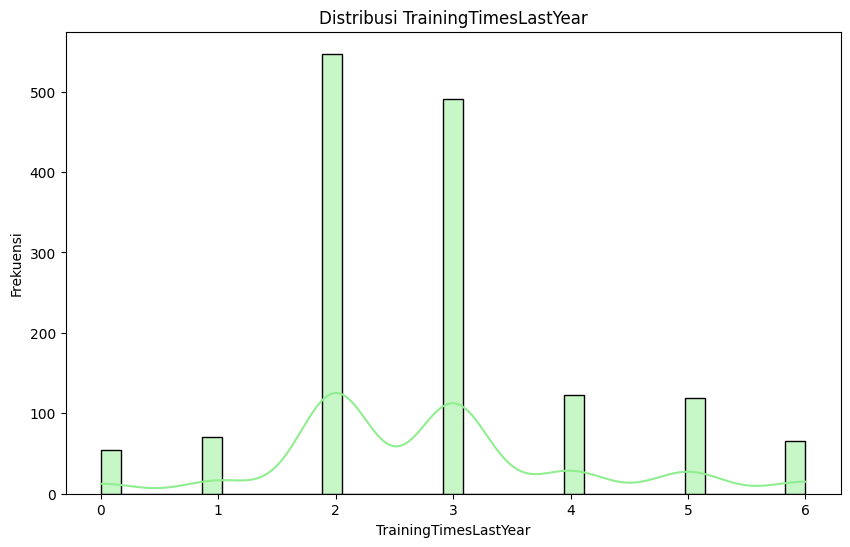

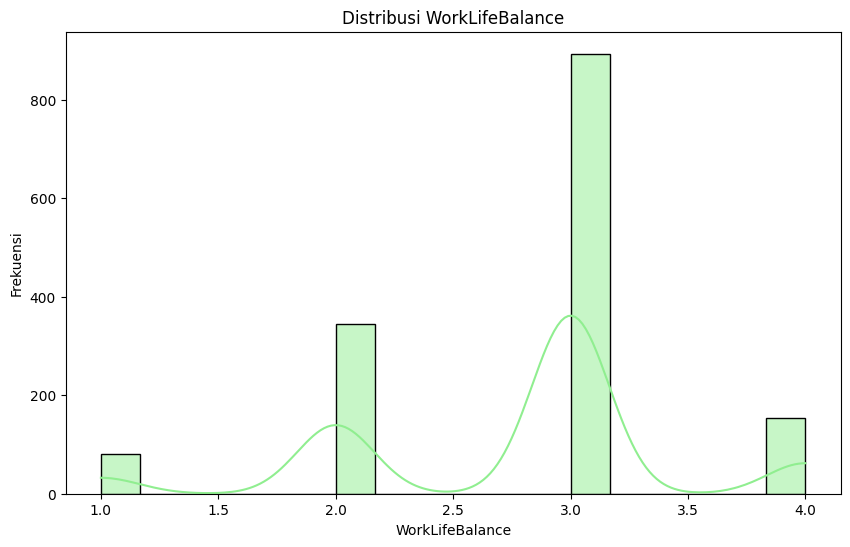

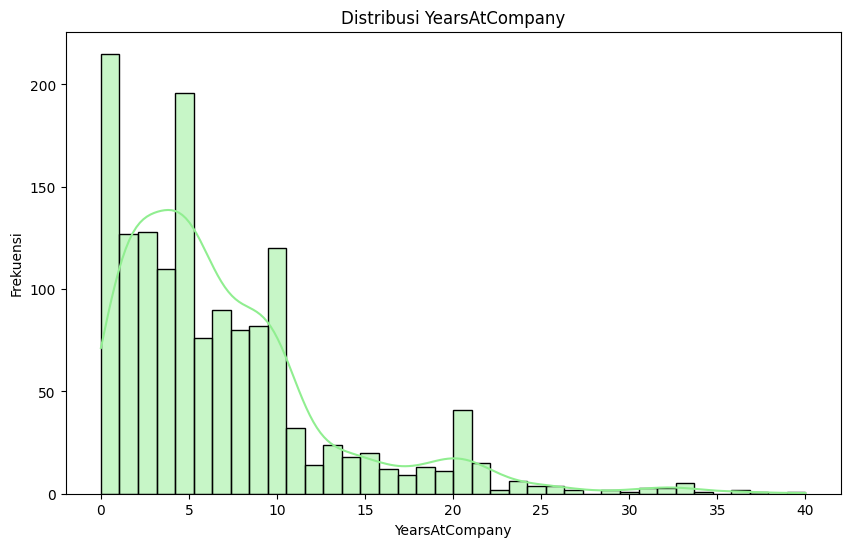

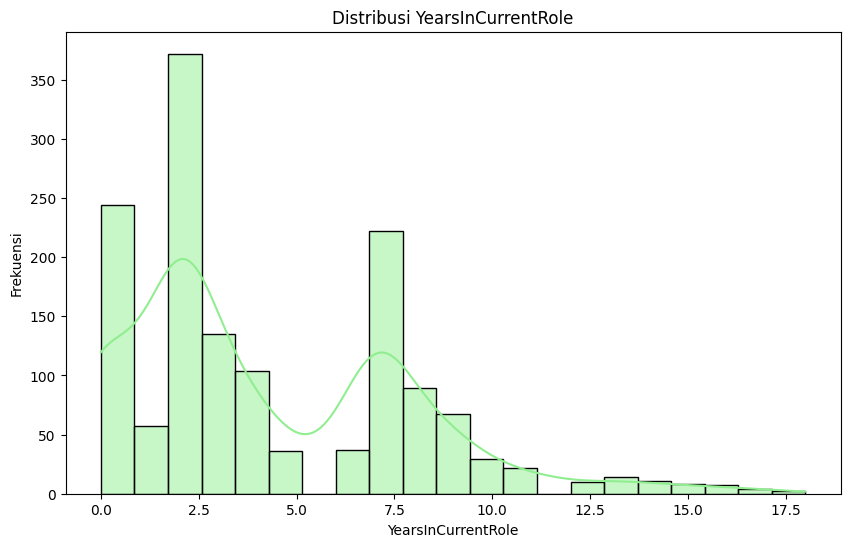

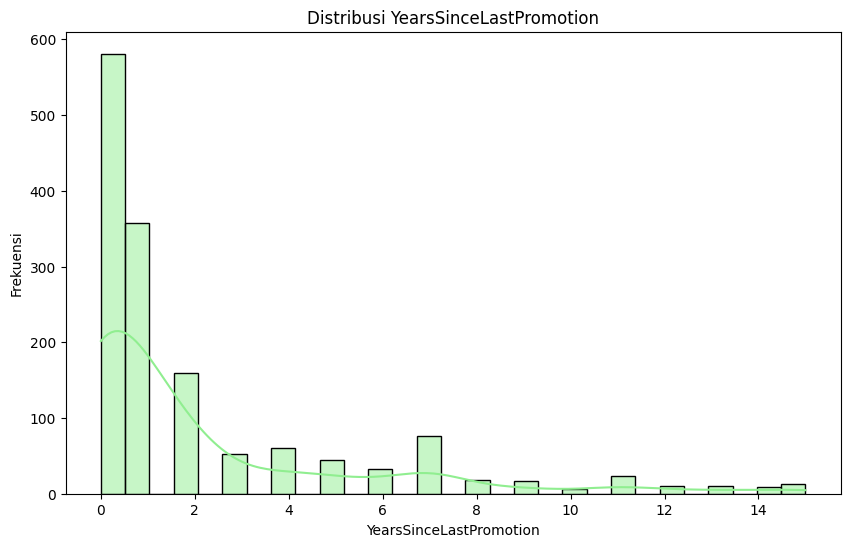

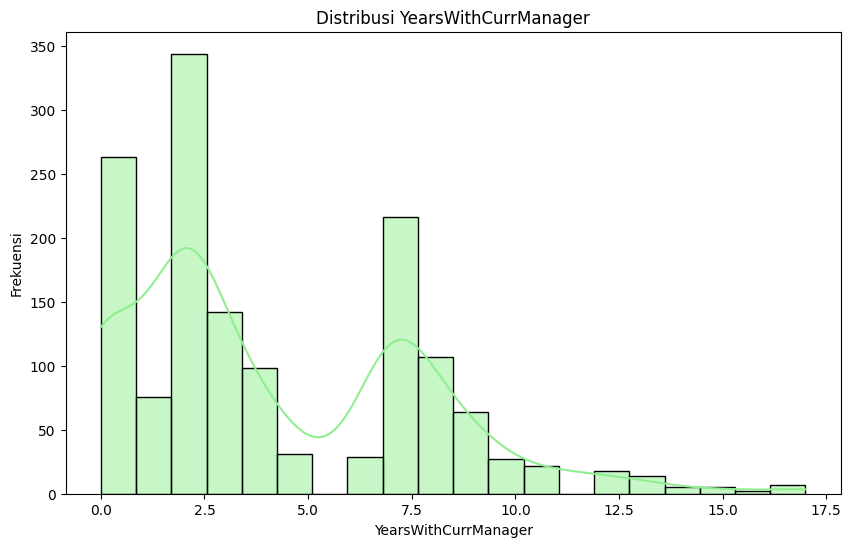

In [63]:
# cek distribusi data
print('Cek Distribusi Data')
for feature in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[feature], color='lightgreen', kde=True)
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.show()

- Korelasi antar Fitur numerik

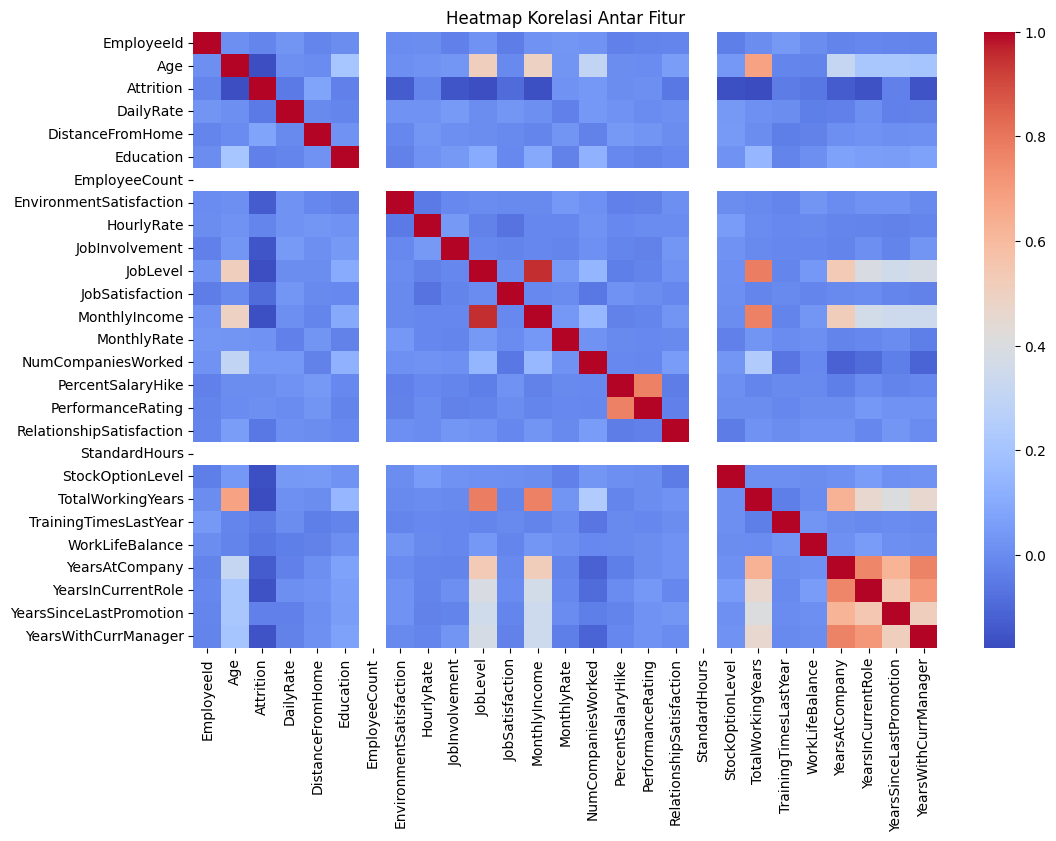

In [64]:
# Filter hanya kolom numerik
numeric_columns = df.select_dtypes(include=[np.number])

# Korelasi antar Fitur
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

Berdasarkan heatmap korelasi antar fitur diatas mengatakan bahwa sebagian besar fitur numerik memiliki korelasi yang rendah satu sama lain. Beberapa fitur dengan korelasi cukup kuat adalah antara TotalWorkingYears dengan YearsAtCompany dan MonthlyIncome dengan JobLevel. Hal ini menunjukkan bahwa pengalaman kerja dan level jabatan berkontribusi besar terhadap pendapatan dan kemungkinan loyalitas karyawan.

1. Usia berpengaruhkah terhadap jenis pekerjaan tertentu?

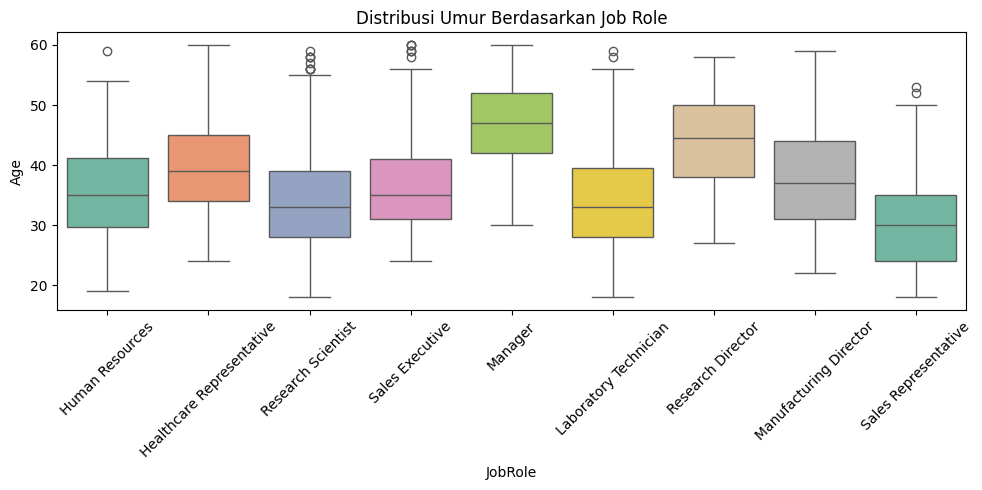

In [65]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='JobRole', y='Age', data=df, hue='JobRole', palette='Set2')
plt.title('Distribusi Umur Berdasarkan Job Role')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Berdasarkan hubungan antara umur yang mempengaruhi jenis pekerjaan diatas terdapat beberapa jenis pekerjaan yang mencerminkan jalur karier yang tidak umum. Beberapa outlier terdeteksi di beberapa jenis pekerjaan terhadap usia yang ekstrem, sehingga perlu dibersihkan agar tidak mengganggu saat analisis dan modelling.

2. Apakah level pekerjaan sesuai dengan pendapatan?

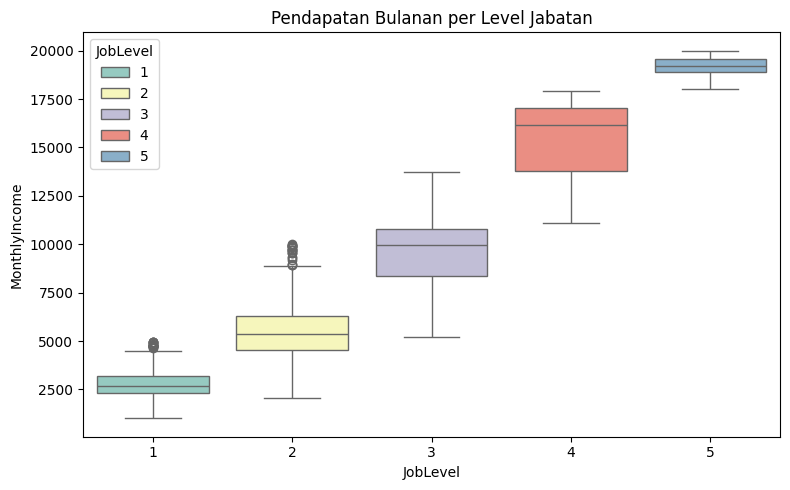

In [66]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='JobLevel', y='MonthlyIncome', data=df, hue='JobLevel', palette='Set3')
plt.title('Pendapatan Bulanan per Level Jabatan')
plt.tight_layout()
plt.show()

Berdasarkan hubungan antara level pekerjaan yang mempengaruhi pendapatan bulanan diatas terdapat beberapa level pekerjaan yang mencerminkan pendapatan yang tidak relevan. Ada beberapa outlier terdeteksi di beberapa level pekerjaan terhadap pendapatan yang kurang, sehingga perlu dibersihkan agar tidak mengganggu saat analisis dan modelling.

3. Apakah lingkungan kerja dapat memberikan kepuasan kerja?

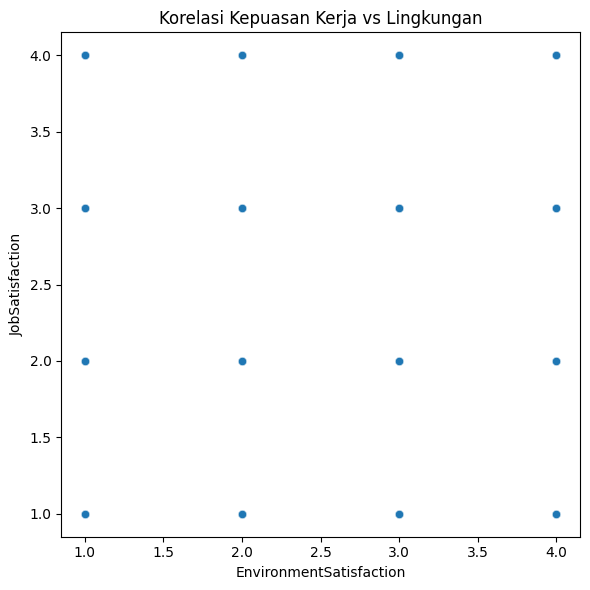

In [67]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='EnvironmentSatisfaction', y='JobSatisfaction', data=df, alpha=0.6)
plt.title('Korelasi Kepuasan Kerja vs Lingkungan')
plt.tight_layout()
plt.show()

Berdasarkan scatter plot, terlihat bahwa nilai kepuasan kerja (JobSatisfaction) dan kepuasan terhadap lingkungan kerja (EnvironmentSatisfaction) tersebar merata tanpa pola linear yang jelas. Ini menunjukkan bahwa tidak terdapat korelasi kuat antara kedua variabel tersebut. Berarti, tingkat kepuasan terhadap lingkungan kerja tidak secara langsung mencerminkan kepuasan terhadap pekerjaan itu sendiri.

4. Bagaimana status pernikahan mempengaruhi loyalitas karyawan?

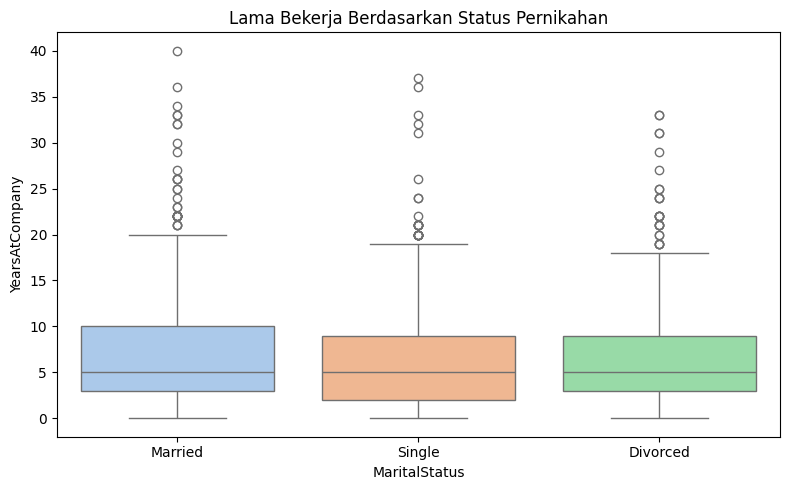

In [68]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='MaritalStatus', y='YearsAtCompany', data=df, hue='MaritalStatus', palette='pastel')
plt.title('Lama Bekerja Berdasarkan Status Pernikahan')
plt.tight_layout()
plt.show()

Berdasarkan hubungan antara status pernikahan yang mempengaruhi lama bekerja diatas terdapat beberapa status yang mencerminkan lama pekerjaan yang tidak umum. Beberapa outlier terdeteksi di beberapa status terhadap berapa lama ia bekerja, sehingga perlu dibersihkan agar tidak mengganggu saat analisis dan modelling.

5. Apakah lembur memicu tingkat berhenti kerja?

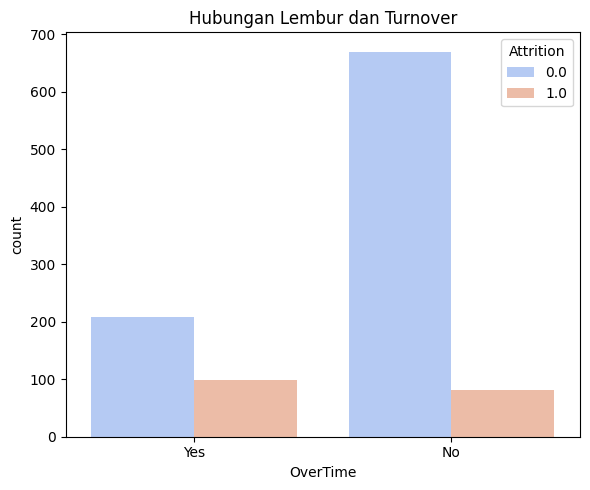

In [69]:
plt.figure(figsize=(6, 5))
sns.countplot(x='OverTime', hue='Attrition', data=df, palette='coolwarm')
plt.title('Hubungan Lembur dan Turnover')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi, terlihat bahwa karyawan yang bekerja lembur (OverTime = Yes) memiliki tingkat turnover (Attrition = 1) yang lebih tinggi dibandingkan yang tidak lembur. Hal ini mengindikasikan bahwa beban kerja yang tinggi bisa menjadi faktor yang mendorong karyawan untuk keluar dari perusahaan.

## Data Preparation / Preprocessing

Data Preparation adalah tahap krusial dalam proses machine learning atau data analysis yang bertujuan membersihkan, merapikan, dan menyiapkan data mentah menjadi bentuk yang bersih, konsisten, dan terstruktur agar siap digunakan oleh model. Tanpa persiapan data yang baik, hasil modeling bisa tidak akurat atau menyesatkan. Berikut tahapan - tahapan pada data preparation sebelum masuk ke modeling yaitu :

1. Membaca informasi data dan membuat dataframe baru.

Memahami struktur Data, sudah dilakukan pada tahap data understanding, Dimana dari hasil dataset finalnya yang akan dilakukan hanya 14 kolom dengan 50000 baris. Namun, pada tahap ini membuat dataframe baru dengan salinan data df ke df_clean.

In [70]:
df_clean = df.copy()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

2. Penanganan Missing Value dan duplikat,

Dari pengecekan yang telah dilakukan, dataset memiliki missing value pada fitur Attrition sebanyak 412 baris. Maka penanganan akan dilakukan dengan cara menghapus baris yang memiliki nilai NaN.

In [71]:
# Hapus baris dengan nilai NaN
df_clean.dropna(inplace=True)

- Mengisi kolom PerformanceRating dengan nilai modus

In [72]:
df_clean['PerformanceRating'] = df_clean['PerformanceRating'].fillna(df_clean['PerformanceRating'].mode()[0])

- Menghapus kolom yang tidak memberikan informatif dimana kolom :
  - StandardHours: Selalu bernilai 80 → konstan, tidak memberikan informasi
  - EmployeeCount: Selalu bernilai 1 → konstan, tidak punya variasi

In [73]:
df_clean.drop(columns=['StandardHours', 'EmployeeCount'], inplace=True, errors='ignore')

In [74]:
print("Sebelum:", df.shape)
print("Sesudah:", df_clean.shape)

Sebelum: (1470, 35)
Sesudah: (1058, 33)


Kini missing value tidak ada lagi karena nilai NaN sudah di hapus. Lalu, untuk data duplikat pada dataset sendiri tidak ada sehingga tidak perlu dilakukan penanganan data. Telah menghapus kolom yang tidak memberikan informatif dan menangani kolom performancerating dengan nilai modus.

- Menampilkan DataFrame setelah penghapusan

In [75]:
print("DataFrame setelah menghapus baris dengan missing values:")
print(df_clean.info())

DataFrame setelah menghapus baris dengan missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1058 non-null   int64  
 1   Age                       1058 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1058 non-null   object 
 4   DailyRate                 1058 non-null   int64  
 5   Department                1058 non-null   object 
 6   DistanceFromHome          1058 non-null   int64  
 7   Education                 1058 non-null   int64  
 8   EducationField            1058 non-null   object 
 9   EnvironmentSatisfaction   1058 non-null   int64  
 10  Gender                    1058 non-null   object 
 11  HourlyRate                1058 non-null   int64  
 12  JobInvolvement            1058 non-null   int64  
 13  JobLevel   

Maka, Dataset final yang akan digunakan pada analisis ini terdapat 33 kolom dengan 1058 baris. Terdiri dari 3 type yaitu : float64(1), int64(24), dan object(8)

3. Menstandarisasi format teks,

Pada tahapan ini tidak dilakukan karena teks sudah konsisten bentuknya, tidak ada kolom teks panjang atau teks bebas sehingga sudah bisa langsung encode.

In [76]:
import re

# Fungsi cleaning teks
def text_cleaning(text):
    if pd.isnull(text):
        return ""

    # Ganti karakter aneh
    text = text.replace('&quot;', '')
    text = text.replace('.hack//', '')
    text = text.replace('&#039;', '')
    text = text.replace('A&#039;s', '')
    text = text.replace('I&#039;', "I'")
    text = text.replace('&amp;', 'and')

    # Lowercase dulu
    text = text.lower()

    # Hapus karakter non-alfabet dan angka (kecuali spasi dan kutip)
    text = re.sub(r"[^a-zA-Z0-9'\s]", ' ', text)

    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()

    # Awal kapital setiap kata
    text = text.title()

    return text

# Terapkan ke semua kolom teks
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = df_clean[col].apply(text_cleaning)

print(df_clean.head())

   EmployeeId  Age  Attrition     BusinessTravel  DailyRate  \
1           2   37        1.0      Travel Rarely       1141   
2           3   51        1.0      Travel Rarely       1323   
3           4   42        0.0  Travel Frequently        555   
6           7   40        0.0      Travel Rarely       1124   
7           8   55        1.0      Travel Rarely        725   

             Department  DistanceFromHome  Education EducationField  \
1  Research Development                11          2        Medical   
2  Research Development                 4          4  Life Sciences   
3                 Sales                26          3      Marketing   
6                 Sales                 1          2        Medical   
7  Research Development                 2          3        Medical   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
1                        1  ...                 3                         1   
2                        1  ...     

Berdasarkan hasil diatas mengatakan berubahnya fitur BusinessTravel yang awalnya pakai garis bawah Travel_Frequently di ganti dengan spasi pada garis bawah.

4. Penanganan Outlier Deteksi

Setelah melihat Boxplot pada tahap sebelumnya dapat dilihat bahwa boxplot tidak simetris (Skewness) namun, bukan berarti error. Tetapi, ada indikator yang mungkin perlu menormalkan distribusi jika nanti menggunakan model yang memerlukan data dengan distribusi yang mendekati normal. Berikut penanganannya :

5. Deteksi Skewness

Tujuannya: Menormalkan distribusi fitur, agar model yang sensitif terhadap distribusi (seperti regresi, SVM) bisa bekerja optimal

Cara umum:
Jika skewness > 1 atau < -1 → fitur sangat skewed

Solusi: pakai transformasi np.log1p() atau np.sqrt()

In [77]:
skewed_feats = df_clean.select_dtypes(include='number').skew().sort_values(ascending=False)
print(skewed_feats)

YearsSinceLastPromotion     1.980618
PerformanceRating           1.960062
YearsAtCompany              1.778856
Attrition                   1.767232
MonthlyIncome               1.304486
TotalWorkingYears           1.082963
NumCompaniesWorked          1.016707
DistanceFromHome            1.006895
StockOptionLevel            1.001635
JobLevel                    0.983745
YearsInCurrentRole          0.903767
YearsWithCurrManager        0.829509
PercentSalaryHike           0.815530
TrainingTimesLastYear       0.520530
Age                         0.404344
EmployeeId                  0.013093
MonthlyRate                 0.007449
HourlyRate                  0.002125
DailyRate                  -0.035031
Education                  -0.264309
EnvironmentSatisfaction    -0.322700
RelationshipSatisfaction   -0.323011
JobSatisfaction            -0.359176
JobInvolvement             -0.473924
WorkLifeBalance            -0.527763
dtype: float64


- Fitur dengan skewness > 0.75 dianggap cukup skewed atau sangat skewed, dan perlu transformasi agar distribusinya lebih simetris.
- Fitur antara 0.5 – 0.75 adalah moderat skewed, bisa dipertimbangkan transformasi jika diperlukan.
- Fitur dengan skewness < ±0.5 relatif normal/symetris dan tidak perlu transformasi.

6. Transformasi dari fitur yang sangat skewed

Transformasi dilakukan menggunakan log untuk fitur skewed ini untuk membantu mendekatkan distribusi tersebut ke bentuk normal sehingga saat analisis akan lebih valid. Berikut fitur yang sangat skewed di lakukan transformasi log1p.

In [78]:
# Transformasi log1p untuk fitur yang sangat skewed
skewed_cols = ['NumCompaniesWorked', 'MonthlyIncome', 'DistanceFromHome',
               'YearsInCurrentRole', 'YearsWithCurrManager', 'YearsAtCompany',
               'TotalWorkingYears', 'PercentSalaryHike', 'YearsSinceLastPromotion',
               'Age', 'JobLevel', 'StockOptionLevel']

for col in skewed_cols:
    df_clean[col] = np.log1p(df_clean[col])

- Pengecekan outlier

--- Cek Outlier dengan Boxplot ---


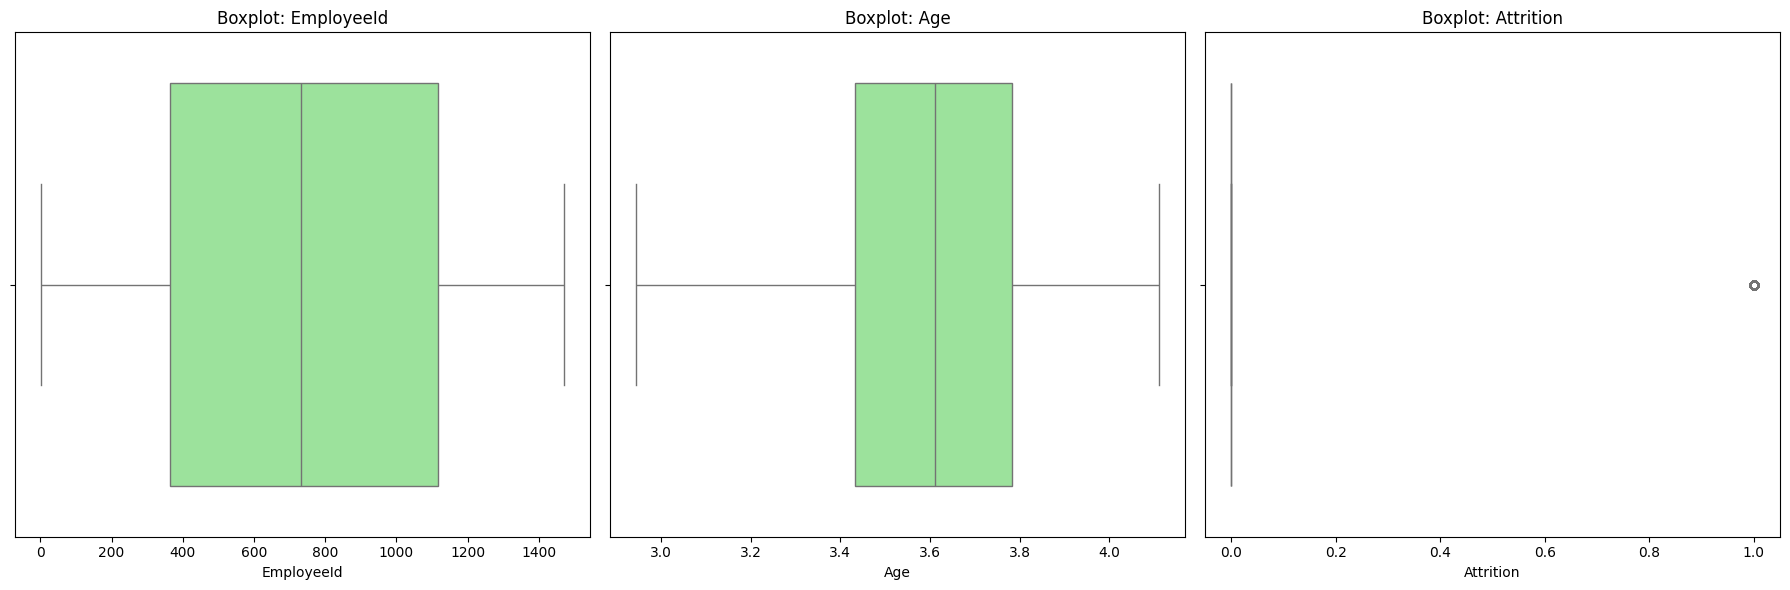

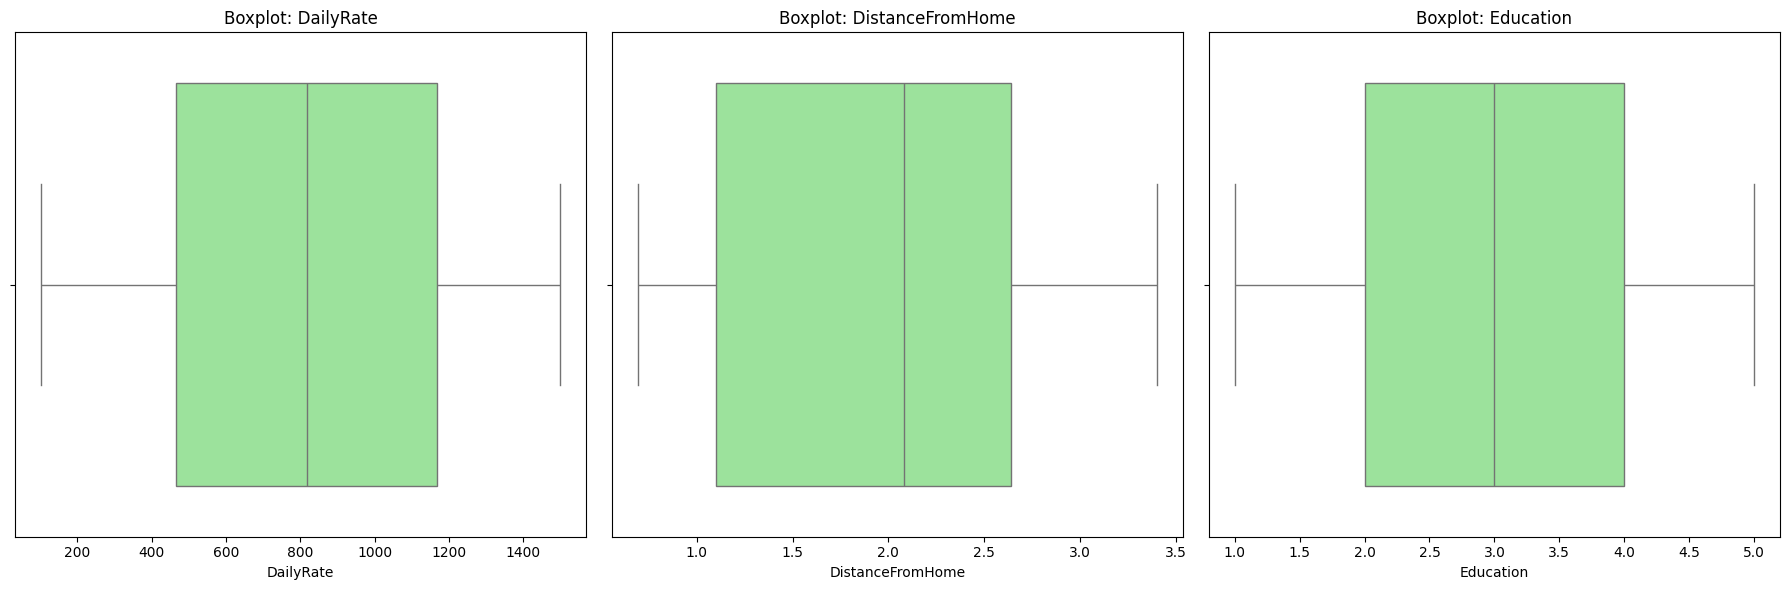

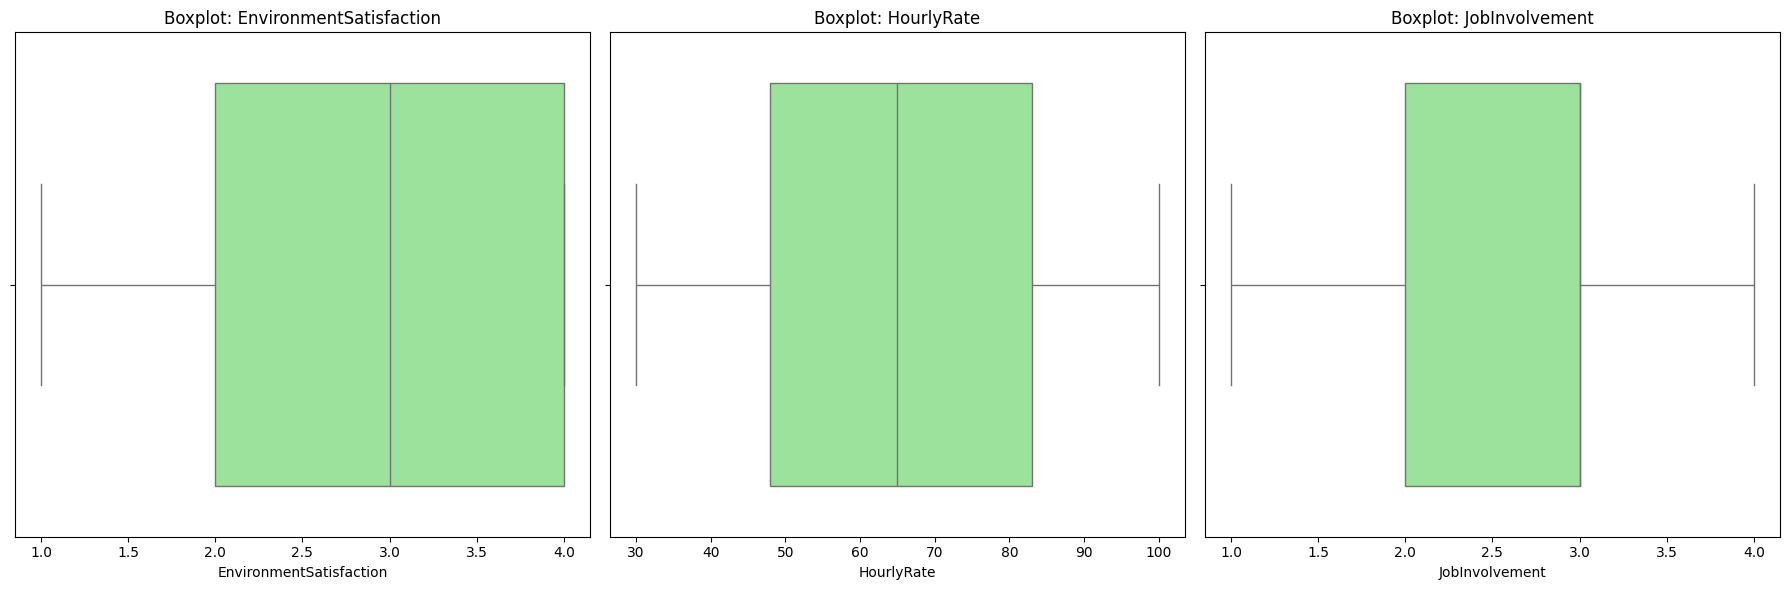

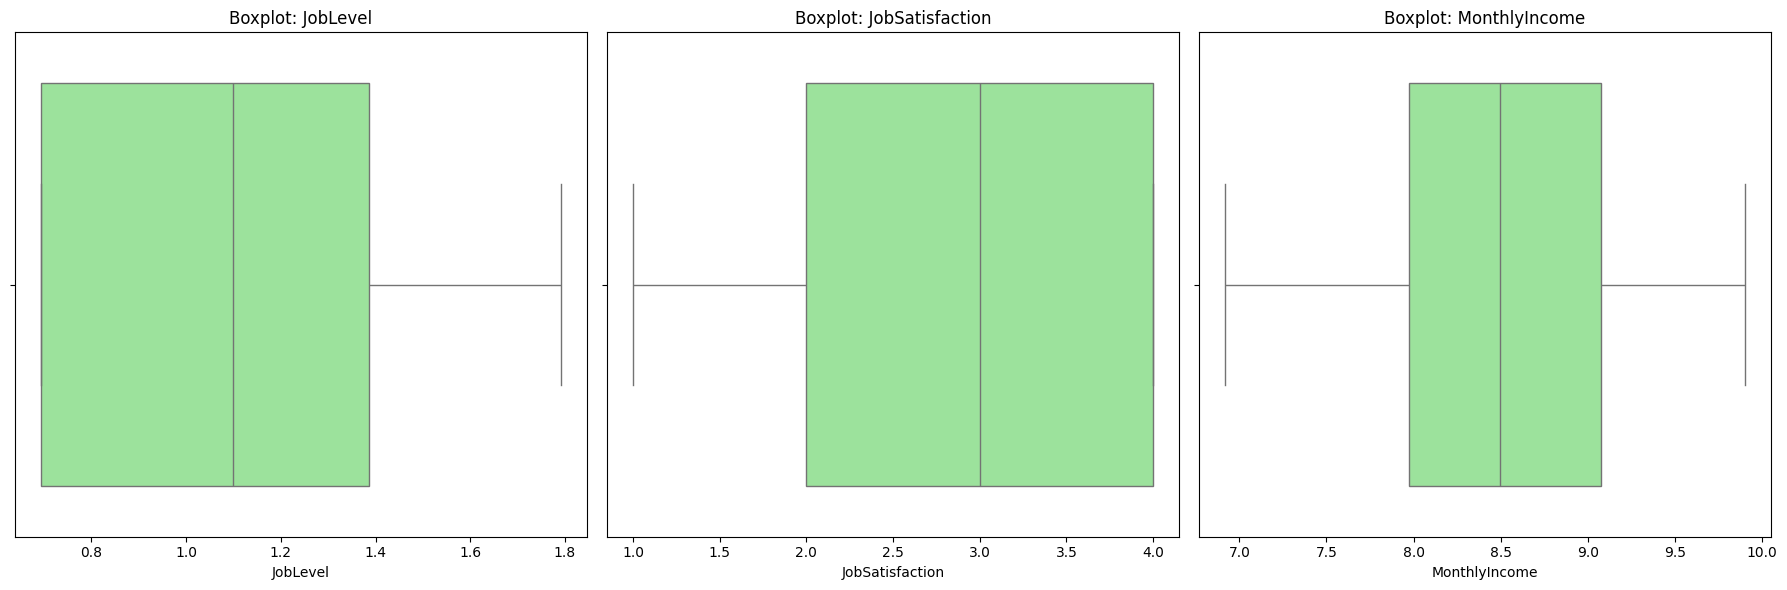

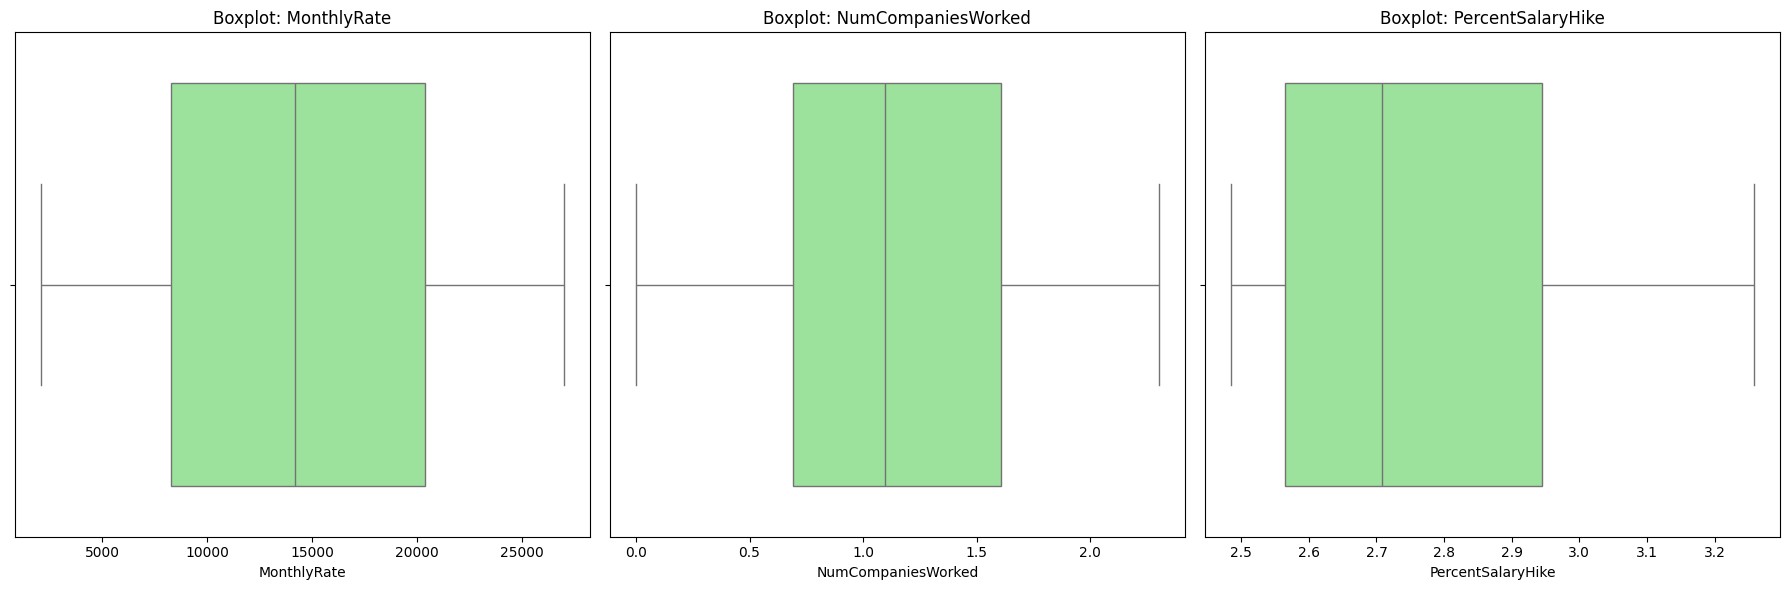

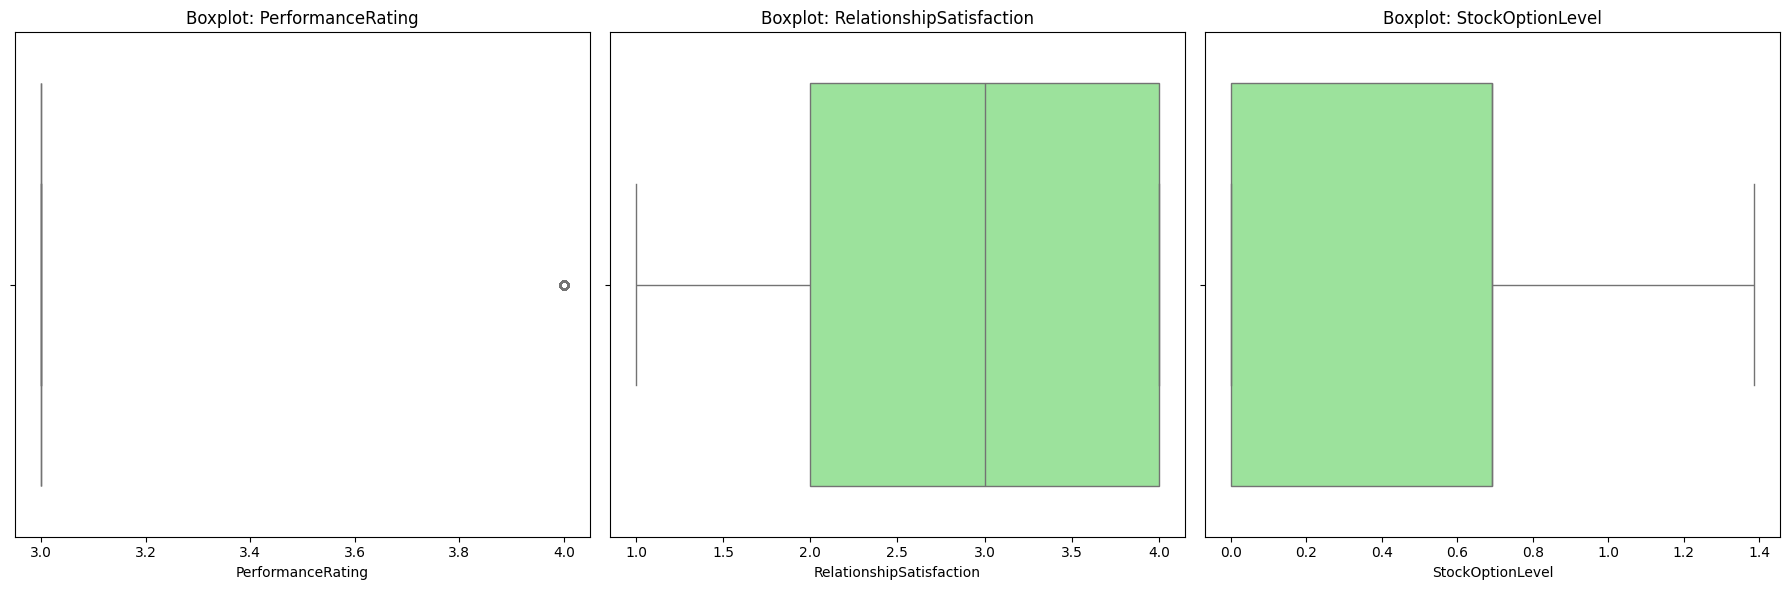

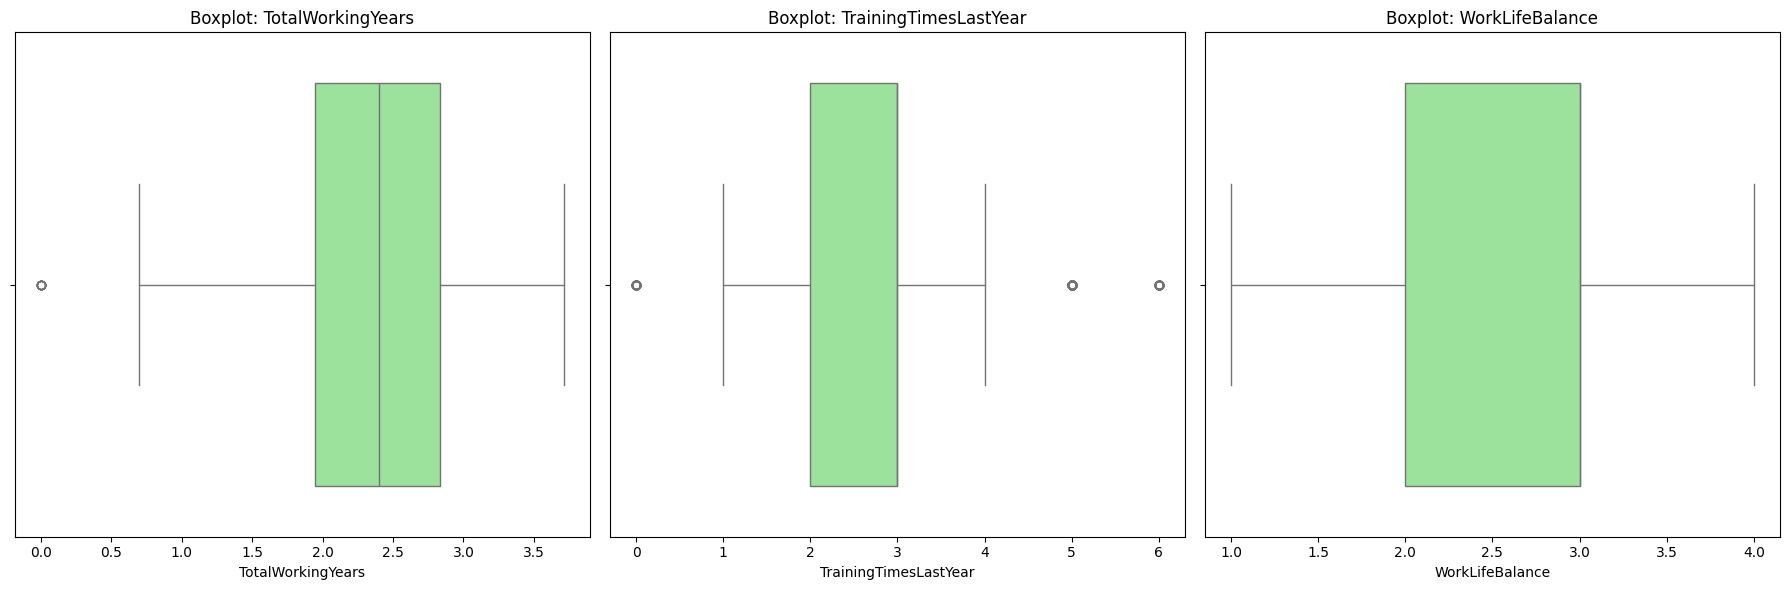

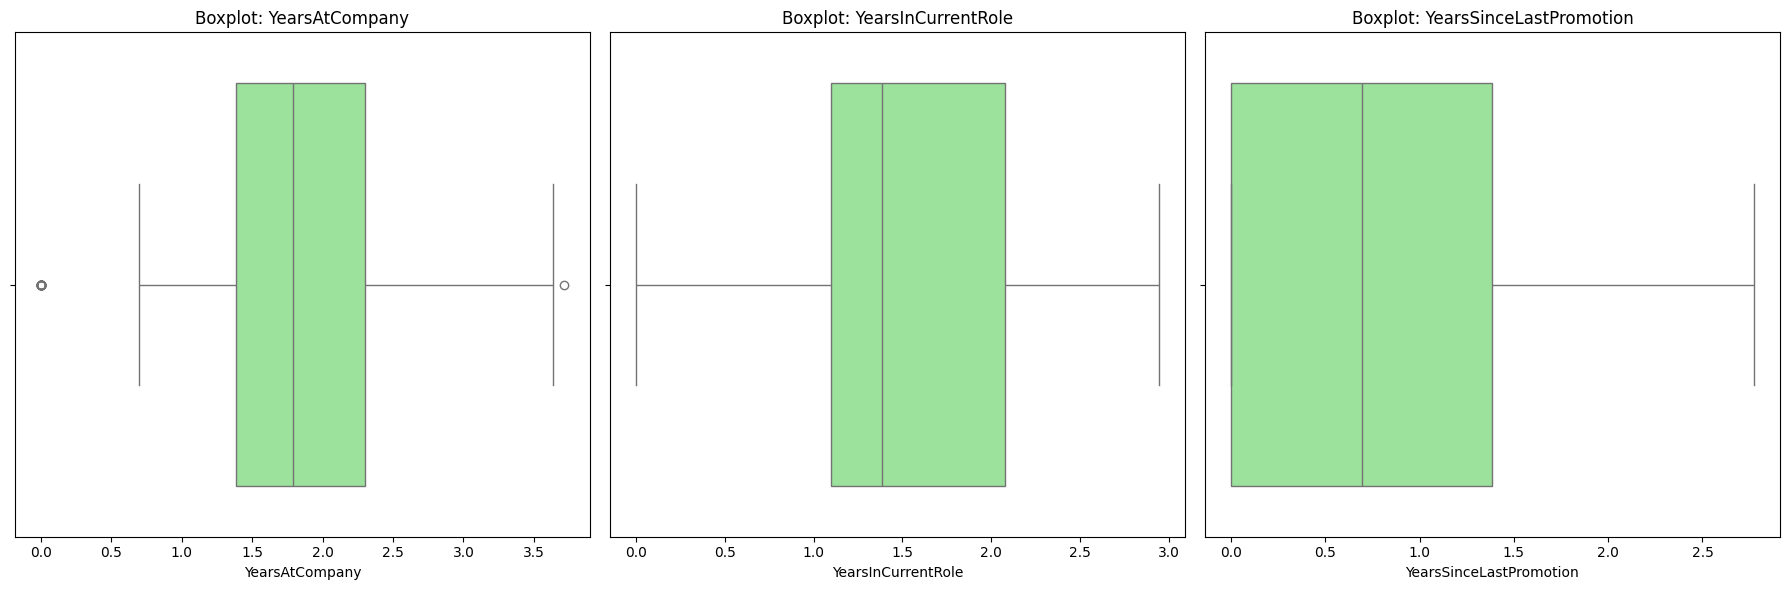

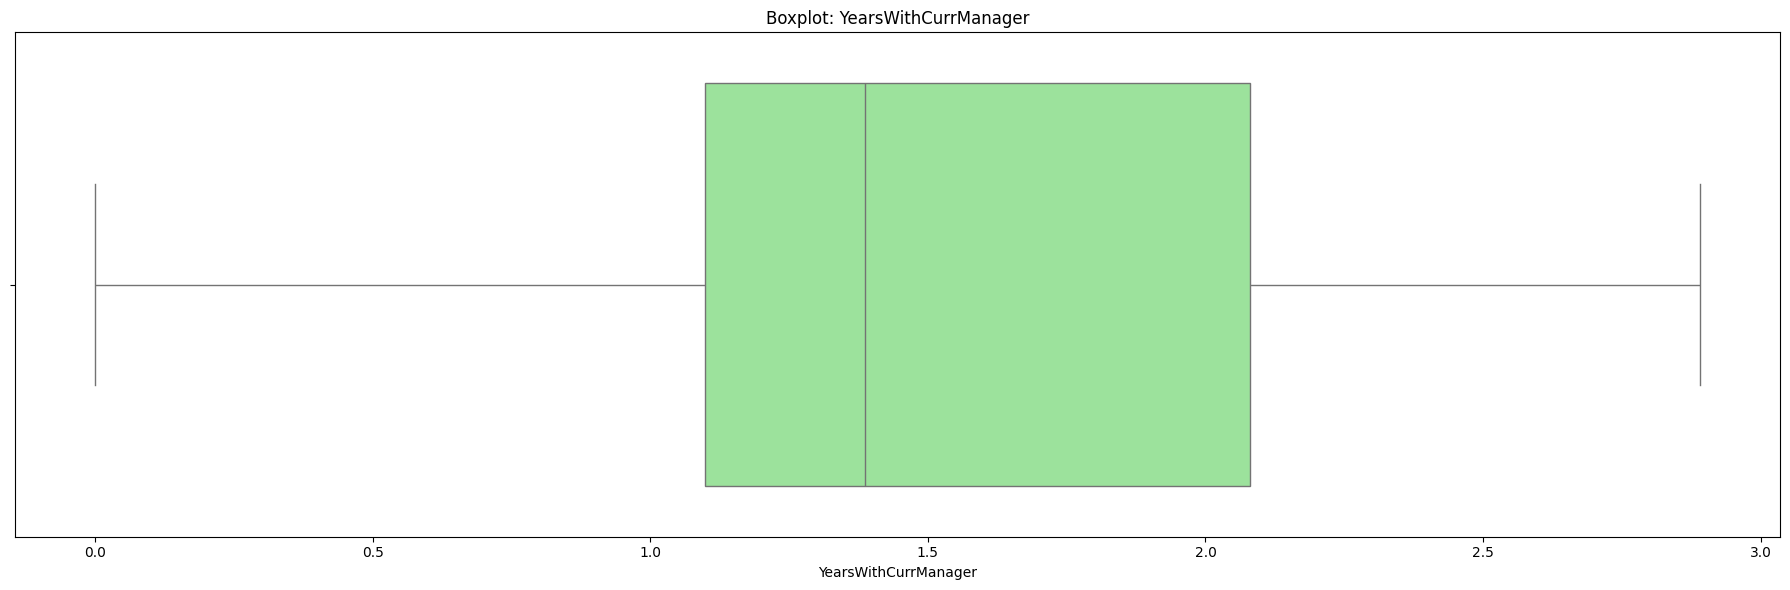

In [79]:
print('--- Cek Outlier dengan Boxplot ---')
cols_numerik = df_clean.select_dtypes(include='number').columns

cols_per_row = 3
num_cols = len(cols_numerik)

for i in range(0, num_cols, cols_per_row):
    sub_cols = cols_numerik[i:i+cols_per_row]
    fig, axes = plt.subplots(1, len(sub_cols), figsize=(18, 6))

    if len(sub_cols) == 1:
        axes = [axes]

    for j, feature in enumerate(sub_cols):
        sns.boxplot(x=df_clean[feature], ax=axes[j], color='lightgreen')
        axes[j].set_title(f'Boxplot: {feature}')

    plt.tight_layout()
    plt.show()

Dari hasil outlier menunjukkan bahwa masih ada outlier dan tidak ada keseimbangan data dari suatu kolom. Namun, hal itu tidak mempengaruhi hasil modelnya.

In [80]:
print(df_clean['Attrition'].value_counts())

Attrition
0.0    879
1.0    179
Name: count, dtype: int64


Maka pada kolom attrition terdapat data nilai 0 (Yes) sebanyak 879 baris dan 1 (No) sebanyak 179 baris.

- Cek hasil akhir

In [81]:
print(f'Dataset akhir: {df_clean.shape[0]} baris dan {df_clean.shape[1]} kolom')

Dataset akhir: 1058 baris dan 33 kolom


In [82]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1058 entries, 1 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1058 non-null   int64  
 1   Age                       1058 non-null   float64
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1058 non-null   object 
 4   DailyRate                 1058 non-null   int64  
 5   Department                1058 non-null   object 
 6   DistanceFromHome          1058 non-null   float64
 7   Education                 1058 non-null   int64  
 8   EducationField            1058 non-null   object 
 9   EnvironmentSatisfaction   1058 non-null   int64  
 10  Gender                    1058 non-null   object 
 11  HourlyRate                1058 non-null   int64  
 12  JobInvolvement            1058 non-null   int64  
 13  JobLevel                  1058 non-null   float64
 14  JobRole      

Dataset akhir: 1058 baris dan 33 kolom

7. Encoding Kategori data

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Pisahkan fitur dan target
X = df_clean.drop('Attrition', axis=1)
y = df_clean['Attrition']

# Encode target class
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

cols_numerik = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cols_category = X.select_dtypes(include='object').columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler() , cols_numerik),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cols_category)
])

Terdapat beberapa tahapan penting yang terkait dengan encoding dan preprocessing data, khususnya dalam menangani fitur numerik dan kategorikal. 
- Label Encoding untuk target (y) mempermudah model dalam menangani klasifikasi dengan data yang sebelumnya kategorikal.
- Standard Scaling pada fitur numerik memastikan bahwa fitur-fitur tersebut berada dalam skala yang setara, mencegah beberapa fitur dominan mempengaruhi model lebih besar daripada fitur lainnya.
- One-Hot Encoding mengubah fitur kategorikal menjadi format yang dapat dipahami oleh algoritma machine learning, yang menghindari masalah seperti model menganggap urutan atau perbedaan nilai antar kategori.

8. Spliting Data

In [84]:
# Split data (train 80% dan test 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

- Split dilakukan sebelum transformasi apapun sehingga tidak membocorkan informasi dari test ke train.
- Data test yang merepresentasikan distribusi nyata membuat metrik seperti precision, recall, dan F1-score lebih dapat diandalkan.
- random_state membuat model bisa dibandingkan antar versi secara adil.
- 20% data dialokasikan sebagai test set (pengujian), dan 80% sebagai training set (pelatihan).

9. Normalization/Scaling

In [85]:
# Fit dan transform data training, dan transform data test
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

X_train_encoded dan X_test_encoded adalah data yang sudah diproses (terencode dan distandarisasi) dan siap untuk digunakan dalam pelatihan model atau evaluasi.

10. SMOTE Balancing

In [86]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_encoded, y_train)

SMOTE (Synthetic Minority Over-sampling Technique) :

Teknik oversampling yang membuat sampel sintetis (baru) dari kelas minoritas (misalnya: karyawan yang resign). Ini dilakukan bukan dengan menyalin data, tetapi dengan menginterpolasi antara data minoritas yang sudah ada.

Hal ini dilakukan untuk menangani ketidakseimbangan kelas (class imbalance) dalam data pelatihan, khususnya untuk kasus seperti prediksi Attrition (karyawan resign) yang biasanya tidak seimbang antara kelas "Yes" dan "No".

- Cek distribusi kelas pada y_train

In [87]:
unique_classes, counts = np.unique(y_train, return_counts=True)
print("Distribusi kelas di y_train:")
for label, count in zip(unique_classes, counts):
    print(f"Label: {label}, Jumlah: {count}")

Distribusi kelas di y_train:
Label: 0, Jumlah: 703
Label: 1, Jumlah: 143


Maka, dapatlah hasil distribusi data di y_train dari label 0 dengan jumlah 703 dan label 1 dengan jumlah 143.

11. Save Data

In [88]:
# Langkah 3: Menyimpan data yang telah diproses ke file CSV
df_clean.to_csv('dataset/data_bersih.csv', index=False)

print("Data telah disimpan ke 'data_bersih.csv'")

Data telah disimpan ke 'data_bersih.csv'


Data yang telah di cleaning dan di proses di simpan dan data telah siap digunakan untuk pemodelan.

## Modeling

- Inisialisasi Model

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Inisialisasi Model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

- Decision Tree memiliki kecenderungan belajar terlalu detail terhadap data train, maka hasil test jeblok.
- Random Forest & XGBoost tahan terhadap overfitting karena ensemble, dan sangat cocok digunakan untuk prediksi dengan data kompleks.
- Neural Network (MLP) bekerja baik, tapi performanya masih di bawah Random Forest dan XGBoost. Bisa ditingkatkan dengan tuning (jumlah neuron/layer, learning rate).
- SMOTE membantu menangani ketidakseimbangan (imbalance) pada kelas target, meningkatkan recall model terhadap kelas minoritas (pegawai resign).

In [90]:
# Evaluasi Semua Model
for name, model in models.items():
    model.fit(X_train_res, y_train_res)  # Fit model pada data pelatihan yang sudah di-resample
    y_pred = model.predict(X_test_encoded)  # Prediksi menggunakan data uji yang sudah diproses

    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()

--- Logistic Regression ---
Accuracy: 0.7216981132075472
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       176
           1       0.35      0.75      0.48        36

    accuracy                           0.72       212
   macro avg       0.64      0.73      0.64       212
weighted avg       0.83      0.72      0.75       212


--- Decision Tree ---
Accuracy: 0.7830188679245284
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       176
           1       0.40      0.58      0.48        36

    accuracy                           0.78       212
   macro avg       0.66      0.70      0.67       212
weighted avg       0.82      0.78      0.80       212


--- Random Forest ---
Accuracy: 0.8679245283018868
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       176
           1       0.75      0.33      0.46        36

    accuracy         

- Evaluasi Kinerja Model Menggunakan Confusion Matrix dan Visualisasi

Train Results:
               Model  Accuracy  Precision   Recall  F1-Score
 Logistic Regression  0.892435   0.884887 0.892435  0.883127
       Decision Tree  1.000000   1.000000 1.000000  1.000000
       Random Forest  1.000000   1.000000 1.000000  1.000000
             XGBoost  1.000000   1.000000 1.000000  1.000000
Neural Network (MLP)  1.000000   1.000000 1.000000  1.000000

Test Results: 
               Model  Accuracy  Precision   Recall  F1-Score
 Logistic Regression  0.867925   0.856415 0.867925  0.859098
       Decision Tree  0.740566   0.754375 0.740566  0.747120
       Random Forest  0.858491   0.860757 0.858491  0.818678
             XGBoost  0.849057   0.830035 0.849057  0.833726
Neural Network (MLP)  0.820755   0.824744 0.820755  0.822665




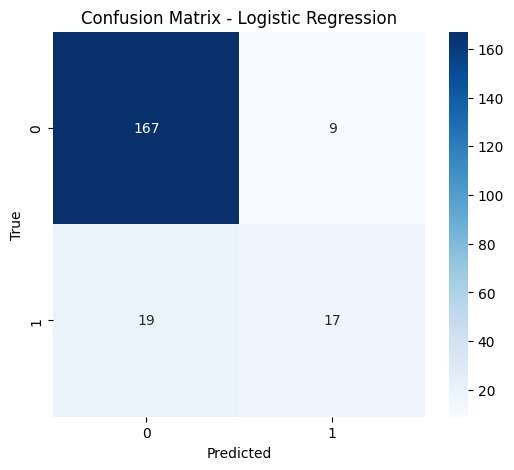

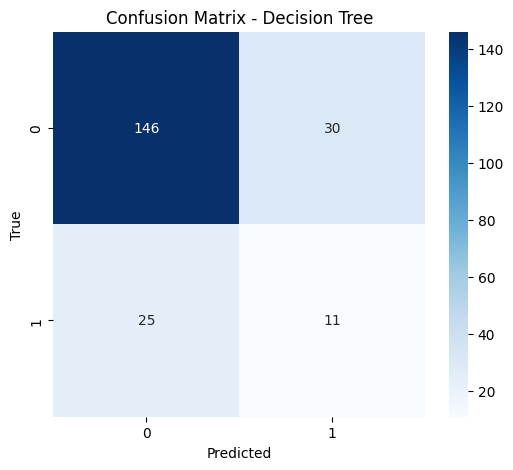

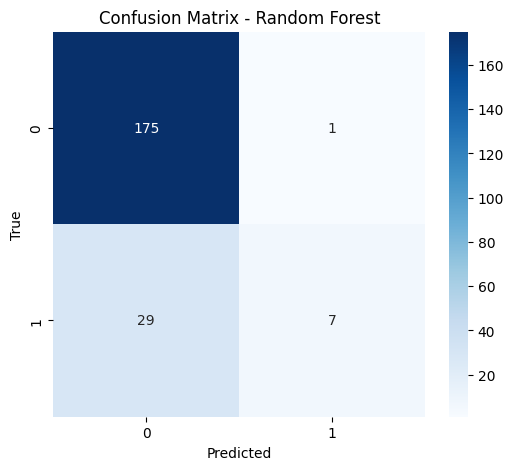

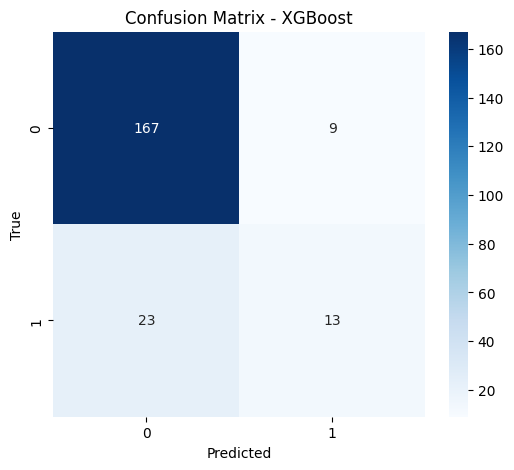

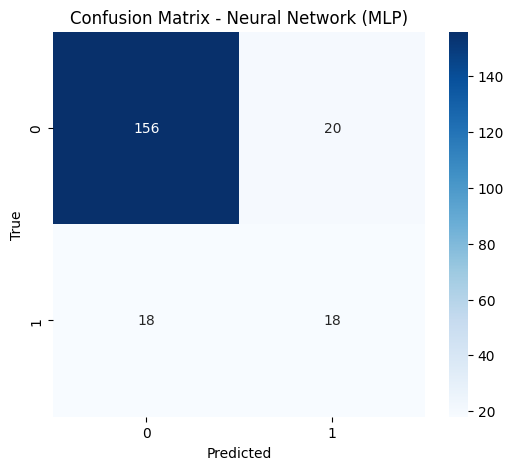

In [91]:
# Evaluation function
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    return {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    }

# Train & evaluate
results_train = {}
results_test = {}

# Train models
for name, model in models.items():
    # Fit model with the appropriate dataset
    if name == 'Logistic Regression':
        model.fit(X_train_encoded, y_train)
    else:
        model.fit(X_train_encoded, y_train)

# Evaluate model
    results_train[name] = evaluate_model(model, X_train_encoded, y_train)
    results_test[name] = evaluate_model(model, X_test_encoded, y_test)

# Print train results
print('Train Results:')
train_df = pd.DataFrame([{'Model': name, **results_train[name]} for name in results_train])
print(train_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']].to_string(index=False))

# Print test results
print('\nTest Results: ')
test_df = pd.DataFrame([{'Model': name, **results_test[name]} for name in results_test])
print(test_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']].to_string(index=False))

print('\n ================================================================= \n')

# Visualize confusion matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test_encoded if name == 'Logistic Regression' else X_test_encoded)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Perbandingan Performa Model

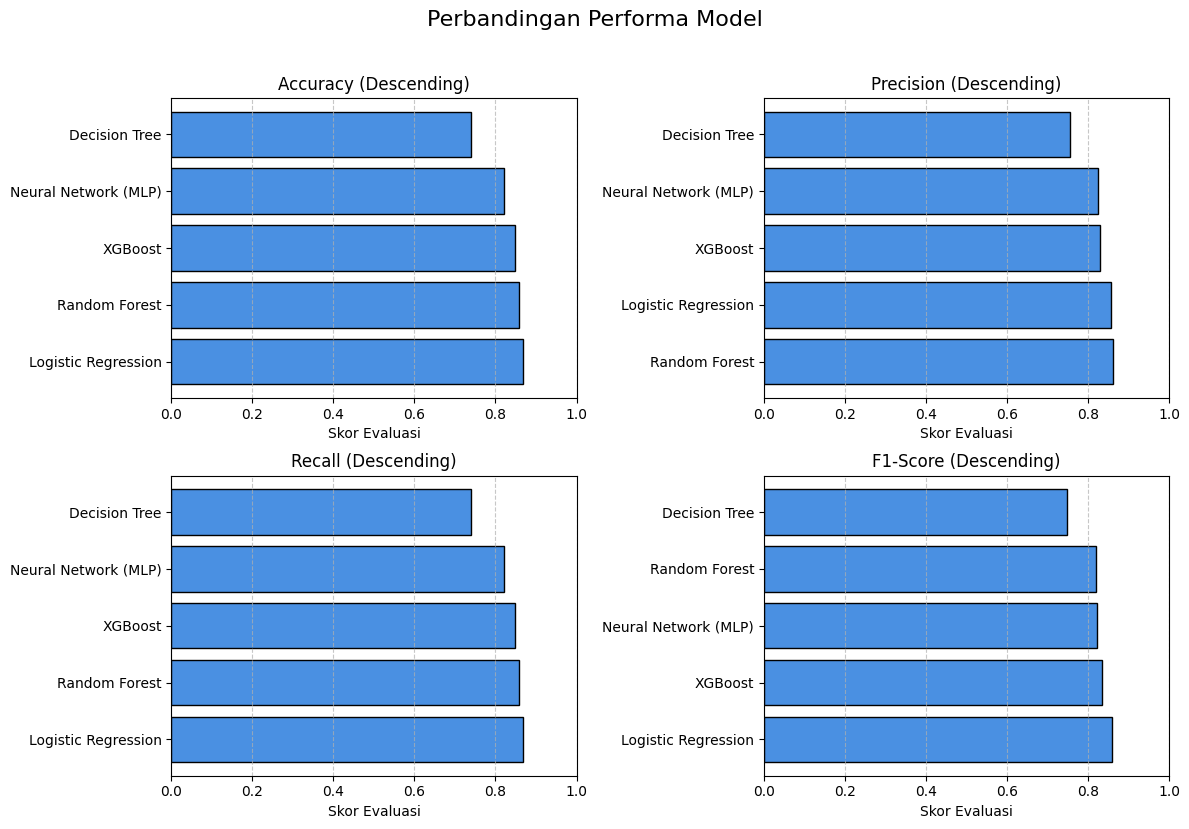

In [92]:
# Salin hasil test ke results_df untuk visualisasi
df_clean = pd.DataFrame([{'Model': name, **results_test[name]} for name in results_test])
results_df = df_clean.copy()

# Metode evaluasi
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Ukuran canvas
plt.figure(figsize=(12, 8))

# Loop untuk masing-masing metrik
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)

    # Urutkan berdasarkan metrik saat ini, descending (tertinggi ke terendah)
    sorted_df = results_df.sort_values(by=metric, ascending=False)

    # Buat bar chart horizontal
    plt.barh(sorted_df['Model'], sorted_df[metric], color='#4A90E2', edgecolor='black')
    plt.title(f'{metric} (Descending)')
    plt.xlim(0, 1)
    plt.xlabel('Skor Evaluasi')
    plt.grid(axis='x', linestyle='--', alpha=0.7)

# Supaya tampilan rapi
plt.tight_layout()
plt.suptitle('Perbandingan Performa Model', fontsize=16, y=1.03)
plt.subplots_adjust(top=0.92)
plt.show()

Analisis Feature Importance dengan Random Forest

In [93]:
# Ambil nama fitur hasil transformasi
feature_names = (
    preprocessor.named_transformers_['num'].get_feature_names_out(cols_numerik).tolist() +
    preprocessor.named_transformers_['cat'].get_feature_names_out(cols_category).tolist()
)

# Contoh pakai Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test_encoded)

# Tampilkan importance
importances = rf.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

print(feat_imp_df.to_string(index=False))

                          Feature  Importance
                      OverTime_No    0.099704
                     OverTime_Yes    0.089876
                 StockOptionLevel    0.048563
             MaritalStatus_Single    0.046162
                TotalWorkingYears    0.036185
            MaritalStatus_Married    0.031465
                    MonthlyIncome    0.029585
                              Age    0.028687
                   JobInvolvement    0.027373
                         JobLevel    0.026761
                  JobSatisfaction    0.026148
                        DailyRate    0.025639
                      MonthlyRate    0.024139
 BusinessTravel_Travel Frequently    0.023275
                       HourlyRate    0.021581
    JobRole_Laboratory Technician    0.020929
           MaritalStatus_Divorced    0.020610
                       EmployeeId    0.020422
                   YearsAtCompany    0.020197
                 DistanceFromHome    0.020074
         RelationshipSatisfaction 

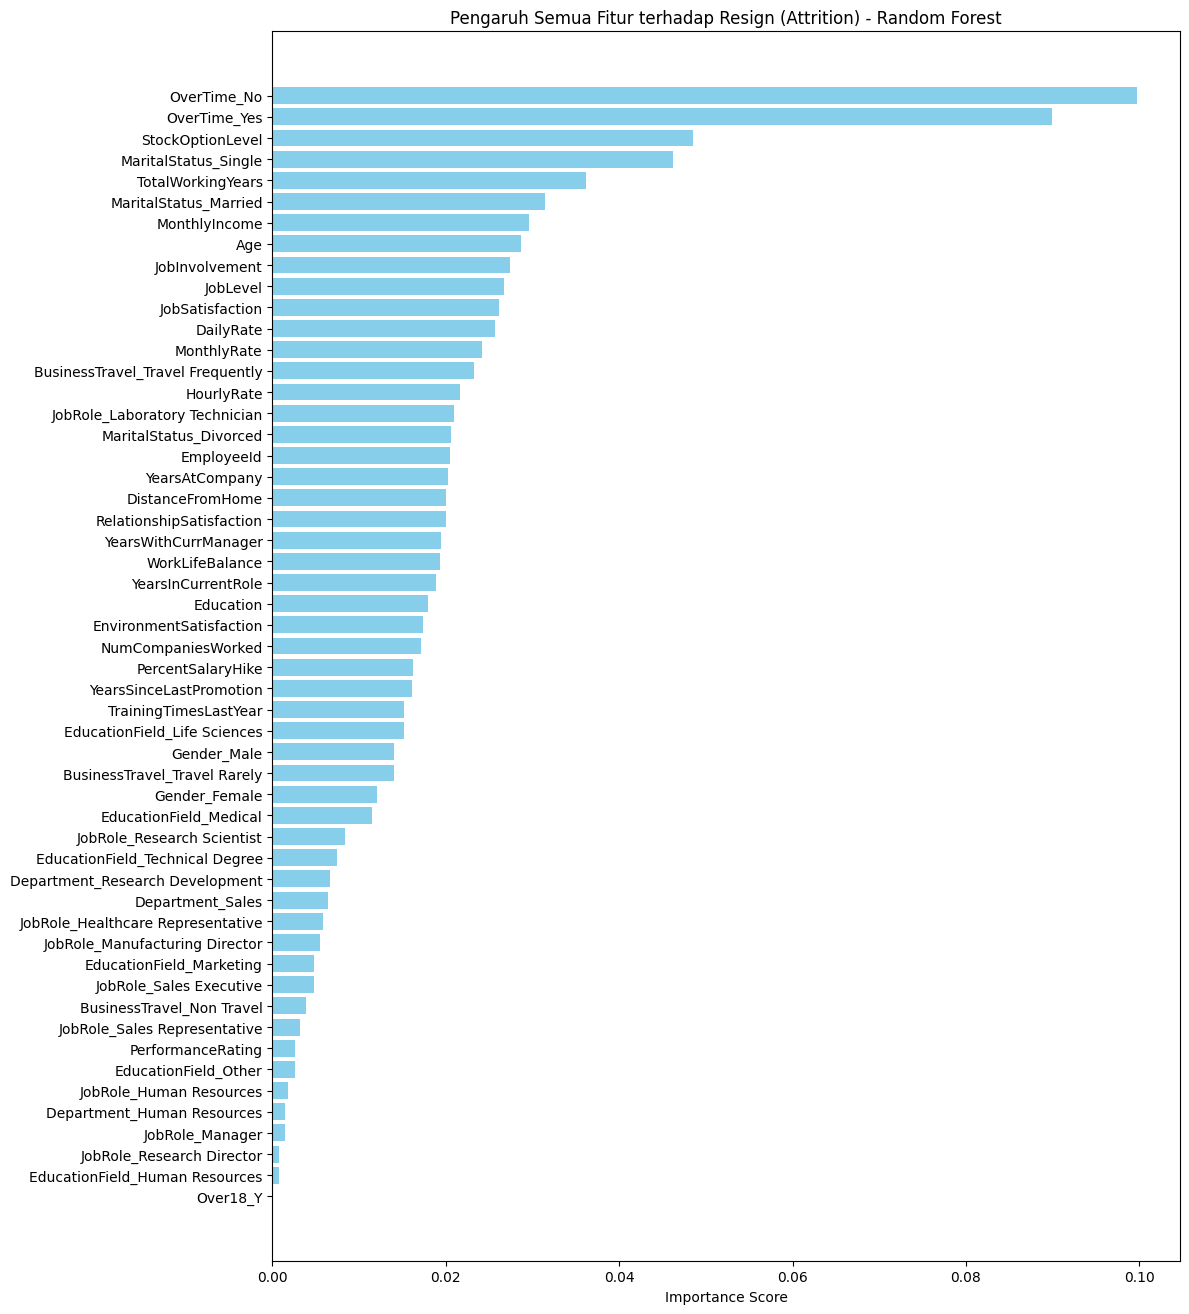

In [94]:
import matplotlib.pyplot as plt

# Visualisasi semua fitur dalam bar chart horizontal
plt.figure(figsize=(12, len(feat_imp_df) * 0.25))  # Tinggi dinamis berdasarkan jumlah fitur
plt.barh(feat_imp_df['Feature'][::-1], feat_imp_df['Importance'][::-1], color='skyblue')
plt.xlabel("Importance Score")
plt.title("Pengaruh Semua Fitur terhadap Resign (Attrition) - Random Forest")
plt.tight_layout()
plt.show()

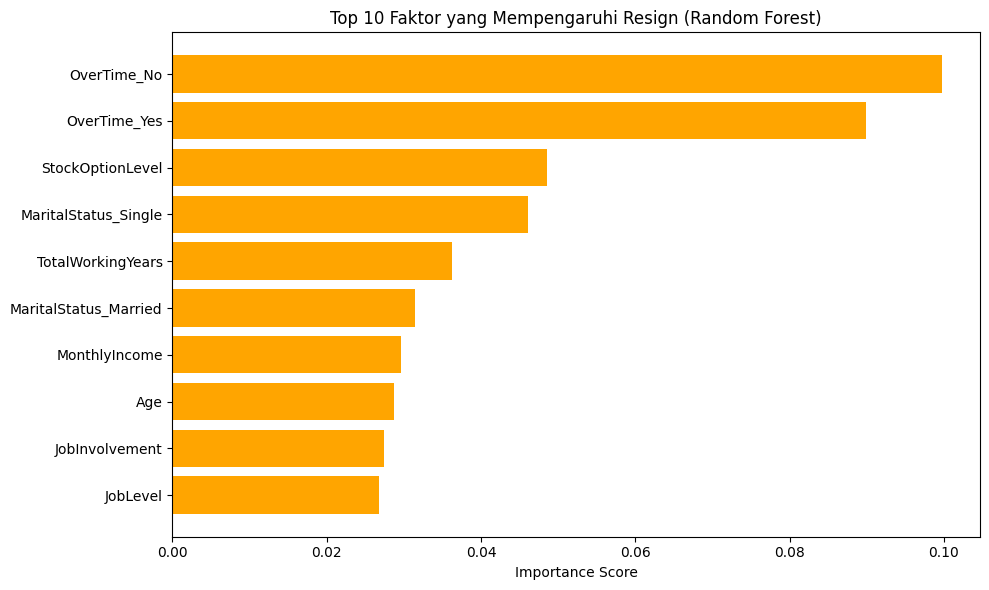

In [95]:
import matplotlib.pyplot as plt

# Ambil Top 10 fitur
top10_feat = feat_imp_df.head(10)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top10_feat['Feature'][::-1], top10_feat['Importance'][::-1], color='orange')
plt.xlabel("Importance Score")
plt.title("Top 10 Faktor yang Mempengaruhi Resign (Random Forest)")
plt.tight_layout()
plt.show()

Dilihat dari diagram diatas menunjukkan 10 faktor yang sangat mempengaruhi karyawan resign adalah banyaknya perusahaan terlalu overtime, terdapatnya stockoptionlevel, pengaruhnya status karyawan itu sendiri dari segi kecukupan kebutuhan, totalworkingyears lama mereka berkerja di perusahaan tersebut, gaji bulanan, umur, tugas dan level pekerjaan.

- Save Model (Random Forest Classifier)

In [96]:
import joblib
import os

# Pastikan folder 'model' ada
os.makedirs('model', exist_ok=True)

# Simpan model satu per satu
joblib.dump(models['Logistic Regression'], 'model/logistic_regression.pkl')
joblib.dump(models['Decision Tree'], 'model/decision_tree.pkl')
joblib.dump(models['Random Forest'], 'model/random_forest.pkl')
joblib.dump(models['Neural Network (MLP)'], 'model/naural_network.pkl')
joblib.dump(models['XGBoost'], 'model/xgboost.pkl')

print ('Masing - masing model telah di simpan pada folder model')

Masing - masing model telah di simpan pada folder model


Model yang telah di training akan di simpan untuk digunakan analisis visualisasinya.

Bungkus ke Pipeline saat training dan simpan

In [97]:
# Simpan preprocessor dan label encoder
joblib.dump(preprocessor, 'model/preprocessor.pkl')
joblib.dump(label_encoder, 'model/label_encoder.pkl')

print ('Masing - masing model telah di simpan pada folder model')

Masing - masing model telah di simpan pada folder model


Model Random Forest menunjukkan performa terbaik dalam mendeteksi kemungkinan karyawan keluar. Dengan mengetahui prediksi ini, HR bisa mengambil tindakan preventif pada karyawan berisiko tinggi. Penggunaan SMOTE berhasil menyeimbangkan data kelas dan meningkatkan kemampuan model dalam mengenali kelas minoritas. Selain itu, pipeline preprocessing yang memisahkan fitur numerik dan kategorik membuat model lebih robust terhadap berbagai jenis input data. 

Penggunaan SMOTE (Synthetic Minority Over-sampling Technique) diperlukan karena:

1. Data tidak seimbang (imbalanced):
Jika jumlah kelas “Yes” (karyawan keluar) jauh lebih sedikit dibanding “No” (karyawan tetap), model akan cenderung bias ke kelas mayoritas, sehingga prediksi untuk karyawan keluar jadi kurang akurat.

2. SMOTE bantu seimbangkan kelas:
SMOTE membuat data sintetis dari kelas minoritas (bukan duplikasi), sehingga model bisa belajar lebih baik dari kedua kelas, meningkatkan recall dan f1-score pada kasus kelas minoritas yang penting—dalam hal ini, karyawan yang berpotensi keluar.

Prediksi data

In [98]:
import pandas as pd
import joblib

# Load model, preprocessor, dan label encoder (jika pakai)
model = joblib.load('model/random_forest.pkl')
preprocessor = joblib.load('model/preprocessor.pkl')

# Load data input
df_new = pd.read_csv('dataset/data_bersih.csv')
if 'Attrition' in df_new.columns:
    df_new = df_new.drop(columns=['Attrition'])

# Preprocess input
X_new = preprocessor.transform(df_new)

# Prediksi
y_pred = model.predict(X_new)

# Tambahkan hasil ke dataframe
df_new['Predicted Attrition'] = y_pred

# Mapping ke Yes/No
df_new['Predicted Attrition Label'] = df_new['Predicted Attrition'].map({0: 'Yes', 1: 'No'})

# Daftar kolom yang di-log1p
skewed_cols = [
    'NumCompaniesWorked', 'MonthlyIncome', 'DistanceFromHome',
    'YearsInCurrentRole', 'YearsWithCurrManager', 'YearsAtCompany',
    'TotalWorkingYears', 'PercentSalaryHike', 'YearsSinceLastPromotion',
    'Age', 'JobLevel', 'StockOptionLevel'
]

# Inverse transform
for col in skewed_cols:
    if col in df_new.columns:
        df_new[col] = df_new[col].apply(np.expm1).round(0).astype(int)

# Simpan hasil ke file CSV
df_new.to_csv('dataset/hasil_prediksi.csv', index=False)

# Tampilkan hasil
print(df_new[['Predicted Attrition', 'Predicted Attrition Label']])
print("Hasil prediksi telah disimpan ke 'hasil_prediksi.csv'")

      Predicted Attrition Predicted Attrition Label
0                       1                        No
1                       1                        No
2                       0                       Yes
3                       0                       Yes
4                       1                        No
...                   ...                       ...
1053                    1                        No
1054                    0                       Yes
1055                    1                        No
1056                    0                       Yes
1057                    1                        No

[1058 rows x 2 columns]
Hasil prediksi telah disimpan ke 'hasil_prediksi.csv'


In [99]:
df_new.head()

,EmployeeId,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Predicted Attrition,Predicted Attrition Label
0,2,37,Travel Rarely,1141,Research Development,11,2,Medical,1,Female,...,0,15,2,1,1,0,0,0,1,No
1,3,51,Travel Rarely,1323,Research Development,4,4,Life Sciences,1,Male,...,3,18,2,4,10,0,2,7,1,No
2,4,42,Travel Frequently,555,Sales,26,3,Marketing,3,Female,...,1,23,2,4,20,4,4,8,0,Yes
3,7,40,Travel Rarely,1124,Sales,1,2,Medical,2,Male,...,3,6,2,2,4,3,0,2,0,Yes
4,8,55,Travel Rarely,725,Research Development,2,3,Medical,4,Male,...,1,24,2,3,5,2,1,4,1,No


## Evaluation

Berdasarkan hasil evaluasi model yang kamu bagikan, ada beberapa model yang memberikan hasil sangat baik pada data training, dengan skor 1 (Accuracy, Precision, Recall, F1-Score) pada Training Results. Namun, pada Test Results, performa model sedikit menurun. Dalam hal ini, kita perlu memilih model yang memberikan keseimbangan terbaik antara Accuracy, Precision, Recall, dan F1-Score, serta mampu menangani ketidakseimbangan data jika ada.

Berikut adalah analisis singkat untuk model yang relevan:
1. Logistic Regression:
    - Test Accuracy: 86.32%
    - F1-Score: 85.51%
    - Precision: 85.18%
    - Recall: 86.32%
Logistic Regression memiliki hasil yang baik pada test set, meskipun tidak setinggi model lainnya. Cocok jika ingin model yang lebih sederhana dan dapat dijelaskan.

2. Decision Tree:
    - Test Accuracy: 74.53%
    - F1-Score: 75.29%
    - Precision: 76.15%
    - Recall: 74.53%

Decision Tree memiliki hasil yang lebih rendah dibandingkan model lainnya di test set, sehingga mungkin tidak menjadi pilihan terbaik.

3. Random Forest:
    - Test Accuracy: 85.85%
    - F1-Score: 81.87%
    - Precision: 86.08%
    - Recall: 85.85%

Random Forest menunjukkan performa yang solid, dengan akurasi dan recall yang tinggi, tetapi F1-Score sedikit lebih rendah. Jika ingin model yang lebih kuat dan stabil, ini adalah pilihan yang sangat baik.

4. XGBoost:
    - Test Accuracy: 84.91%
    - F1-Score: 83.37%
    - Precision: 83.00%
    - Recall: 84.91%

XGBoost menunjukkan kinerja yang hampir setara dengan Random Forest, tetapi sedikit lebih rendah dalam beberapa metrik. XGBoost cocok untuk situasi di mana model boosting memberikan keuntungan.

5. Neural Network (MLP):
    - Test Accuracy: 82.08%
    - F1-Score: 82.27%
    - Precision: 82.47%
    - Recall: 82.08%

MLP menunjukkan hasil yang cukup baik di test set, meskipun tidak sebagus beberapa model lainnya. Neural Networks bisa menjadi pilihan bagus jika ingin menangani fitur yang lebih kompleks, meskipun mungkin overfitting pada data training.

Model Terbaik
Random Forest tampaknya menjadi pilihan terbaik karena memberikan keseimbangan yang baik antara akurasi, precision, recall, dan F1-score pada test set. Ini menunjukkan bahwa model ini memiliki kemampuan yang baik untuk mendeteksi kemungkinan karyawan keluar dengan tingkat akurasi yang tinggi, serta cukup robust.

Disini kita menganalisis faktor-faktor yang mempengaruhi prediksi karyawan keluar, Random Forest juga memberikan informasi penting mengenai feature importance, yang bisa digunakan untuk mengidentifikasi faktor yang paling berpengaruh.

Namun, jika model yang lebih sederhana dan lebih mudah untuk diinterpretasi lebih penting, Logistic Regression bisa menjadi pilihan yang baik, meskipun dengan akurasi yang sedikit lebih rendah dibandingkan dengan Random Forest.